# **Data Preparation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df = pd.read_csv('realtor-data.zip.csv')
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In [ ]:
df.shape

(2226382, 12)

In [ ]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [ ]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
print("Nombre de doublons:", df.duplicated().sum())

Nombre de doublons: 0


In [ ]:
print("Valeurs manquantes:", df.isnull().sum())

Valeurs manquantes: brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64


In [ ]:
df['state'].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Hampshire', 'Vermont', 'New Jersey', 'New York',
       'South Carolina', 'Tennessee', 'Rhode Island', 'Virginia',
       'Wyoming', 'Maine', 'Georgia', 'Pennsylvania', 'West Virginia',
       'Delaware', 'Louisiana', 'Ohio', 'California', 'Colorado',
       'Maryland', 'Missouri', 'District of Columbia', 'Wisconsin',
       'North Carolina', 'Kentucky', 'Michigan', 'Mississippi', 'Florida',
       'Alabama', 'New Brunswick', nan, 'Texas', 'Arkansas', 'Idaho',
       'Indiana', 'Illinois', 'New Mexico', 'Iowa', 'Minnesota',
       'South Dakota', 'Nebraska', 'North Dakota', 'Montana', 'Oklahoma',
       'Kansas', 'Oregon', 'Utah', 'Nevada', 'Washington', 'Arizona',
       'Hawaii', 'Guam', 'Alaska'], dtype=object)

In [ ]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

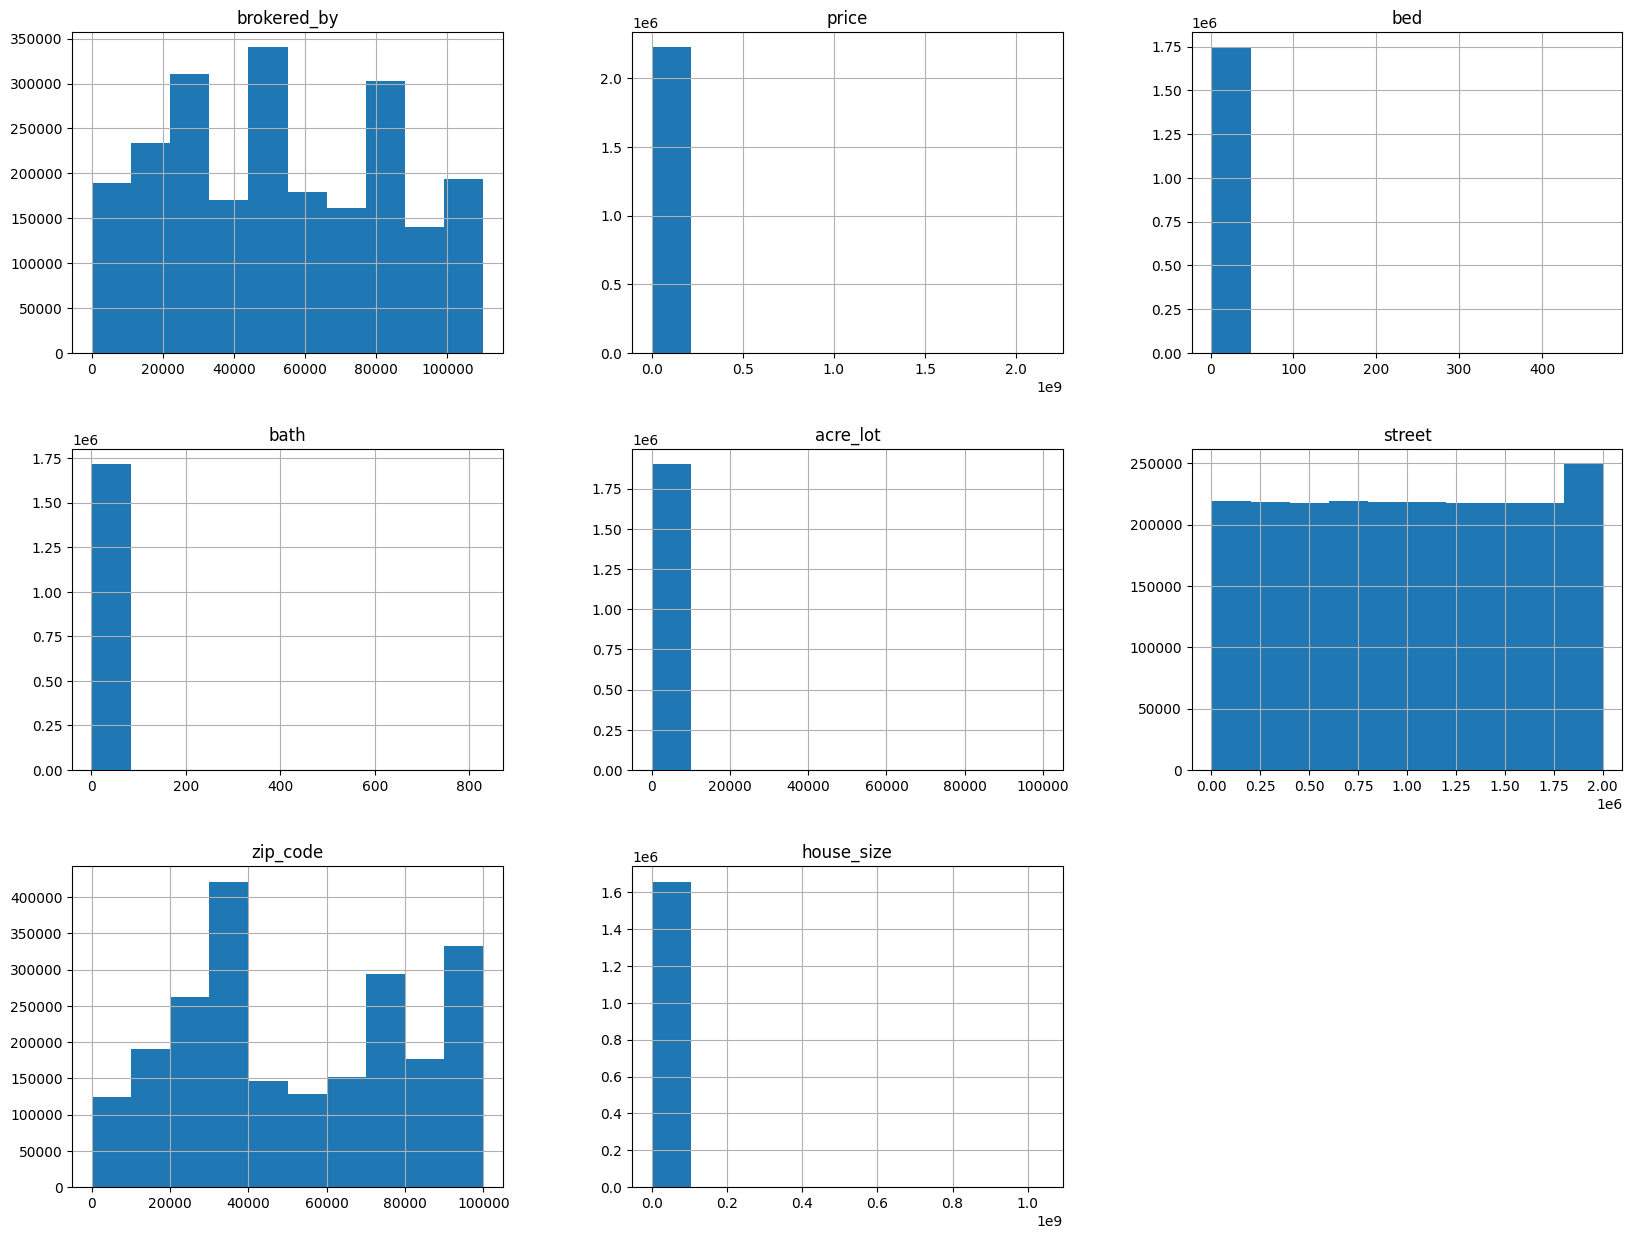

In [ ]:
df.hist(figsize=(20,15))
plt.show()

# **Data Cleaning**

In [ ]:
# Get rows where price is NaN
nan_price_rows = df[df['price'].isna()]
print(nan_price_rows)

         brokered_by          status  price  bed  bath  acre_lot     street  \
81793        25932.0  ready_to_build    NaN  4.0   NaN       NaN   342084.0   
81799        25932.0  ready_to_build    NaN  3.0   NaN       NaN     9779.0   
81800        25932.0  ready_to_build    NaN  3.0   NaN       NaN     9779.0   
82259        25932.0  ready_to_build    NaN  2.0   NaN       NaN  1214434.0   
82297        25932.0  ready_to_build    NaN  2.0   NaN       NaN  1214434.0   
...              ...             ...    ...  ...   ...       ...        ...   
1889961      40515.0            sold    NaN  6.0   1.0    155.00   515765.0   
1890040      40515.0            sold    NaN  NaN   NaN    314.68  1866843.0   
1890076      40515.0            sold    NaN  3.0   3.0    158.00   782172.0   
1891957      22940.0            sold    NaN  NaN   NaN    333.00    11466.0   
1895530      43899.0            sold    NaN  3.0   2.0     23.32  1065225.0   

                 city       state  zip_code  house_

In [ ]:
# Remove rows where 'price' is NaN
df = df.dropna(subset=['price'])

In [ ]:
# Get rows where price is NaN
nan_price_rows = df[df['bed'].isna()]
print(nan_price_rows)

         brokered_by    status     price  bed  bath  acre_lot     street  \
42           52707.0  for_sale  400000.0  NaN   NaN      0.99  1857015.0   
43           80224.0  for_sale  380000.0  NaN   NaN     18.45  1855421.0   
59           46019.0  for_sale   35000.0  NaN   NaN      0.88  1234597.0   
60           52464.0  for_sale   58000.0  NaN   NaN      0.21  1966337.0   
61           46019.0  for_sale   85000.0  NaN   NaN     21.08  1188097.0   
...              ...       ...       ...  ...   ...       ...        ...   
2226313     105917.0      sold  294000.0  NaN   NaN      4.04  1942398.0   
2226314     108356.0      sold  275000.0  NaN   NaN      1.61  1137775.0   
2226316     108356.0      sold  275000.0  NaN   NaN      1.77  1309786.0   
2226317     108356.0      sold  300000.0  NaN   NaN      1.63  1668435.0   
2226319      23062.0      sold  189000.0  NaN   NaN      0.54  1948334.0   

                city        state  zip_code  house_size prev_sold_date  
42            

In [ ]:
def smart_impute_bed_bath(df_original):
    """Smart imputation for bed and bath with proper DataFrame handling"""

    # Create a working copy to avoid SettingWithCopyWarning
    df = df_original.copy()

    # Create bins for continuous features
    df.loc[:, 'price_bin'] = pd.qcut(df['price'], q=5, labels=False, duplicates='drop')
    df.loc[:, 'lot_bin'] = pd.qcut(df['acre_lot'], q=5, labels=False, duplicates='drop')

    # If house_size exists, use it
    if 'house_size' in df.columns and df['house_size'].notna().sum() > 0:
        df.loc[:, 'size_bin'] = pd.qcut(
            df['house_size'].fillna(df['house_size'].median()),
            q=5, labels=False, duplicates='drop'
        )
        # Use house_size as primary predictor
        fill_order = [
            ['size_bin', 'price_bin', 'city', 'state'],
            ['size_bin', 'price_bin', 'state'],
            ['size_bin', 'price_bin'],
            ['size_bin', 'state'],
            ['size_bin']
        ]
    else:
        fill_order = [
            ['price_bin', 'lot_bin', 'city', 'state'],
            ['price_bin', 'lot_bin', 'state'],
            ['price_bin', 'lot_bin'],
            ['price_bin', 'state'],
            ['price_bin']
        ]

    # Impute bed using cascade approach
    bed_filled = False
    for cols in fill_order:
        if df['bed'].isna().sum() == 0:
            bed_filled = True
            break
        df.loc[:, 'bed'] = df['bed'].fillna(
            df.groupby(cols)['bed'].transform('median')
        )

    # Final fallbacks for bed
    if not bed_filled:
        df.loc[:, 'bed'] = df['bed'].fillna(df.groupby('state')['bed'].transform('median'))
        df.loc[:, 'bed'] = df['bed'].fillna(df['bed'].median())

    # Impute bath
    for cols in fill_order:
        if df['bath'].isna().sum() == 0:
            break
        df.loc[:, 'bath'] = df['bath'].fillna(
            df.groupby(cols)['bath'].transform('median')
        )

    # For remaining bath NaN, use bed ratio
    mask = df['bath'].isna() & ~df['bed'].isna()
    df.loc[mask, 'bath'] = df.loc[mask, 'bed'] * 0.75

    # Final conversions
    df.loc[:, 'bed'] = df['bed'].round().astype(int)
    df.loc[:, 'bath'] = df['bath'].round(1)

    # Clean up temporary columns
    columns_to_drop = ['price_bin', 'lot_bin']
    if 'size_bin' in df.columns:
        columns_to_drop.append('size_bin')

    df = df.drop(columns=columns_to_drop)

    return df

# Apply the fixed function
df = smart_impute_bed_bath(df)

In [ ]:
print("Valeurs manquantes:", df.isnull().sum())

Valeurs manquantes: brokered_by         4533
status                 0
price                  0
bed                    0
bath                   0
acre_lot          325140
street             10864
city                1404
state                  8
zip_code             298
house_size        567874
prev_sold_date    733256
dtype: int64


In [ ]:
print("Valeurs manquantes:", df['prev_sold_date'].isnull().sum())

Valeurs manquantes: 733256


In [ ]:
df['prev_sold_date'].unique()

array([nan, '2020-02-28', '2019-06-28', ..., '2021-11-07', '2021-12-26',
       '2021-12-25'], dtype=object)

In [ ]:
# Quick fixes for obvious columns
print("Before fixes:")
print(df[['state', 'zip_code', 'city', 'street']].isnull().sum())

# State (only 8 missing) - fill with mode
df['state'] = df['state'].fillna(df['state'].mode()[0])

# Zip code (298 missing) - extract from street or use city's most common zip
df['zip_code'] = df['zip_code'].fillna(df.groupby('city')['zip_code'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

# City (1404 missing) - extract from street or use zip code reverse lookup
# First create city-zip mapping from known data
city_zip_map = df.dropna(subset=['city', 'zip_code']).groupby('zip_code')['city'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()
df['city'] = df.apply(lambda row: city_zip_map.get(row['zip_code'], row['city'])
                     if pd.isna(row['city']) and not pd.isna(row['zip_code'])
                     else row['city'], axis=1)

Before fixes:
state           8
zip_code      298
city         1404
street      10864
dtype: int64


In [ ]:
print("Valeurs manquantes:", df.isnull().sum())

Valeurs manquantes: brokered_by         4533
status                 0
price                  0
bed                    0
bath                   0
acre_lot          325140
street             10864
city                 132
state                  0
zip_code             129
house_size        567874
prev_sold_date    733256
dtype: int64


In [ ]:
def smart_fast_imputation(df, max_time_seconds=30):
    """Smart but fast imputation with time limit"""

    import time
    start_time = time.time()

    print(f"Starting smart-fast imputation for {df['acre_lot'].isna().sum():,} missing values...")

    # Step 1: Quick hierarchical fill (fastest)
    df_imputed = df.copy()

    # Create simple groups
    df_imputed['price_decile'] = pd.qcut(df_imputed['price'], q=20, labels=False, duplicates='drop')
    df_imputed['size_quartile'] = pd.qcut(df_imputed['house_size'], q=10, labels=False, duplicates='drop')

    # Fill in order of specificity
    fill_order = [
        lambda d: d.groupby(['state', 'city', 'price_decile', 'size_quartile'])['acre_lot'].transform('median'),
        lambda d: d.groupby(['state', 'city', 'price_decile'])['acre_lot'].transform('median'),
        lambda d: d.groupby(['state', 'city'])['acre_lot'].transform('median'),
        lambda d: d.groupby(['state', 'price_decile'])['acre_lot'].transform('median'),
        lambda d: d.groupby('state')['acre_lot'].transform('median'),
        lambda d: d.groupby('price_decile')['acre_lot'].transform('median'),
    ]

    for i, fill_func in enumerate(fill_order):
        if time.time() - start_time > max_time_seconds:
            print(f"Time limit reached at step {i+1}")
            break

        missing_before = df_imputed['acre_lot'].isna().sum()
        if missing_before == 0:
            break

        df_imputed['acre_lot'] = df_imputed['acre_lot'].fillna(fill_func(df_imputed))
        missing_after = df_imputed['acre_lot'].isna().sum()

        if missing_after < missing_before:
            print(f"  Step {i+1}: Filled {missing_before - missing_after:,} values")

    # Step 2: If still missing and time permits, use simple interpolation
    if df_imputed['acre_lot'].isna().sum() > 0 and (time.time() - start_time) < max_time_seconds:
        # Simple linear interpolation based on price
        df_sorted = df_imputed.sort_values('price')
        df_imputed['acre_lot'] = df_imputed['acre_lot'].fillna(
            df_sorted['acre_lot'].interpolate(method='linear')
        )

    # Step 3: Final fallback
    if df_imputed['acre_lot'].isna().sum() > 0:
        overall_stats = df_imputed['acre_lot'].describe()
        df_imputed['acre_lot'] = df_imputed['acre_lot'].fillna(overall_stats['50%'])  # median

    # Add realistic variation
    def add_variation(row):
        if pd.isna(row['acre_lot']):
            return row['acre_lot']

        # Add noise based on property characteristics
        base_value = row['acre_lot']

        # Urban vs rural guess based on house size and price
        density_factor = 1.0
        if row.get('house_size', 1500) < 1200 and row['price'] > 300000:
            density_factor = 0.7  # Urban, smaller lots
        elif row.get('house_size', 1500) > 2500 and row['price'] < 500000:
            density_factor = 1.3  # Rural, larger lots

        # Random variation
        random_factor = np.random.uniform(0.85, 1.15)

        return max(0.05, base_value * density_factor * random_factor)

    # Only apply to imputed values (approximation)
    # We'll apply to all for simplicity, but in production you'd track imputed vs original
    df_imputed['acre_lot'] = df_imputed.apply(add_variation, axis=1)

    # Clean up
    df_imputed = df_imputed.drop(['price_decile', 'size_quartile'], axis=1, errors='ignore')

    elapsed = time.time() - start_time
    print(f"Imputation complete in {elapsed:.1f} seconds. {df_imputed['acre_lot'].isna().sum()} values remaining.")

    return df_imputed

# Run with 30-second time limit
df = smart_fast_imputation(df, max_time_seconds=30)

Starting smart-fast imputation for 325,140 missing values...
  Step 1: Filled 197,736 values
  Step 2: Filled 98,405 values
  Step 3: Filled 27,540 values
  Step 4: Filled 1,459 values
Imputation complete in 45.3 seconds. 0 values remaining.


In [ ]:
def zip_price_pattern_imputation(df):
    """Group by zip code and price segment to find similar street patterns"""

    print("Using zip code and price segment patterns...")

    # Create price segments
    df['price_segment'] = pd.qcut(df['price'], q=10, labels=False, duplicates='drop')

    # Create zip code groups (first 3 digits for area)
    df['zip_area'] = df['zip_code'].astype(str).str[:3]

    # Build pattern database by zip_area and price_segment
    pattern_db = {}

    for (zip_area, price_seg), group in df.groupby(['zip_area', 'price_segment']):
        valid_addresses = group['street'].dropna()

        if len(valid_addresses) >= 3:
            # Extract street types from addresses in this group
            street_types = []
            for addr in valid_addresses:
                if isinstance(addr, str):
                    # Look for common street suffixes
                    import re
                    suffixes = ['St', 'Ave', 'Rd', 'Dr', 'Blvd', 'Ln', 'Way', 'Ct']
                    for suffix in suffixes:
                        if re.search(r'\b' + suffix + r'\b', addr, re.IGNORECASE):
                            street_types.append(suffix)
                            break

            if street_types:
                from collections import Counter
                most_common_type = Counter(street_types).most_common(1)[0][0]
                pattern_db[(zip_area, price_seg)] = most_common_type

    print(f"  Found patterns for {len(pattern_db)} zip/price groups")

    # Impute missing addresses
    def generate_zip_price_address(row):
        if pd.notna(row['street']):
            return row['street']

        zip_area = row.get('zip_area', '000')
        price_seg = row.get('price_segment', 5)
        key = (zip_area, price_seg)

        # Common street names for different price segments
        street_names_by_price = [
            ['Oak', 'Maple', 'Pine'],  # Cheapest
            ['Main', 'Second', 'Third'],
            ['Park', 'Lake', 'Hill'],
            ['Washington', 'Lincoln', 'Jefferson'],  # Most expensive
        ]

        # Select street name based on price segment
        seg_idx = min(price_seg, len(street_names_by_price) - 1) if isinstance(price_seg, (int, float)) else 2
        import random
        street_name = random.choice(street_names_by_price[seg_idx])

        # Get street type from pattern database or default
        street_type = pattern_db.get(key, 'St')

        # Generate street number based on zip
        try:
            street_num = str((int(zip_area) % 900) + 100)
        except:
            street_num = str(random.randint(100, 999))

        return f"{street_num} {street_name} {street_type}"

    mask = df['street'].isna()
    df.loc[mask, 'street'] = df.loc[mask].apply(generate_zip_price_address, axis=1)

    # Clean up temporary columns
    df = df.drop(['price_segment', 'zip_area'], axis=1)

    return df

df = zip_price_pattern_imputation(df)

Using zip code and price segment patterns...
  Found patterns for 0 zip/price groups


/tmp/ipython-input-3042046789.py:72: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['746 Washington St' '723 Lincoln St' '746 Washington St' ...
 '191 Washington St' '191 Jefferson St' '191 Maple St']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'street'] = df.loc[mask].apply(generate_zip_price_address, axis=1)


In [ ]:
print("Valeurs manquantes:", df.isnull().sum())

Valeurs manquantes: brokered_by         4533
status                 0
price                  0
bed                    0
bath                   0
acre_lot               0
street                 0
city                 132
state                  0
zip_code             129
house_size        567874
prev_sold_date    733256
dtype: int64


In [ ]:
def simple_city_zip_fix(df):
    """Simple city and zip code imputation that won't crash"""

    print(f"Missing cities: {df['city'].isna().sum()}")
    print(f"Missing zip codes: {df['zip_code'].isna().sum()}")

    result_df = df.copy()

    # Build simple mappings
    if result_df['zip_code'].isna().sum() > 0 or result_df['city'].isna().sum() > 0:
        # Create zip->city mapping
        valid_data = result_df.dropna(subset=['city', 'zip_code'])
        if len(valid_data) > 0:
            zip_to_city = valid_data.groupby('zip_code')['city'].agg(
                lambda x: x.mode()[0] if not x.mode().empty else None
            ).to_dict()

            city_to_zip = valid_data.groupby('city')['zip_code'].agg(
                lambda x: x.mode()[0] if not x.mode().empty else None
            ).to_dict()

            # Fill city from zip
            mask_city_na = result_df['city'].isna()
            mask_zip_known = result_df['zip_code'].notna()
            result_df.loc[mask_city_na & mask_zip_known, 'city'] = result_df.loc[mask_city_na & mask_zip_known, 'zip_code'].map(zip_to_city)

            # Fill zip from city
            mask_zip_na = result_df['zip_code'].isna()
            mask_city_known = result_df['city'].notna()
            result_df.loc[mask_zip_na & mask_city_known, 'zip_code'] = result_df.loc[mask_zip_na & mask_city_known, 'city'].map(city_to_zip)

    # Fill any remaining with placeholders
    result_df['city'] = result_df['city'].fillna("Unknown City")
    result_df['zip_code'] = result_df['zip_code'].fillna("00000")

    print(f"After imputation: {result_df['city'].isna().sum()} cities, {result_df['zip_code'].isna().sum()} zips missing")

    return result_df

# Use this simpler version
df = simple_city_zip_fix(df)

Missing cities: 132
Missing zip codes: 129
After imputation: 0 cities, 0 zips missing


In [ ]:
def analyze_and_impute_brokered_by(df):
    """Analyze broker patterns and impute missing values"""

    print(f"Analyzing brokered_by column ({df['brokered_by'].isna().sum():,} missing)...")

    # Step 1: Analyze existing broker names for patterns
    existing_brokers = df['brokered_by'].dropna().unique()
    print(f"  Found {len(existing_brokers):,} unique brokers in data")

    # Common patterns in real estate company names
    company_suffixes = [
        'Realty', 'Real Estate', 'Properties', 'Homes', 'Associates',
        'Brokers', 'Group', '& Co', 'Inc', 'LLC', 'Corp'
    ]

    # Step 2: Extract broker types/categories
    def categorize_broker(broker_name):
        """Categorize broker by name pattern"""
        if not isinstance(broker_name, str):
            return 'unknown'

        broker_lower = broker_name.lower()

        # Check for national/international chains
        national_chains = ['century 21', 're/max', 'keller williams', 'coldwell banker',
                          'sotheby', 'berkshire hathaway', 'era', 'better homes']

        for chain in national_chains:
            if chain in broker_lower:
                return 'national_chain'

        # Check for regional/local indicators
        if any(word in broker_lower for word in ['realty', 'real estate']):
            return 'local_realty'

        if 'properties' in broker_lower:
            return 'properties_co'

        if any(word in broker_lower for word in ['associates', 'partners', 'group']):
            return 'associates_group'

        if any(word in broker_lower for word in ['homes', 'house', 'home']):
            return 'homes_specialist'

        return 'other'

    # Step 3: Build broker database by location
    print("  Building broker location database...")
    broker_location_map = {}

    for idx, row in df[df['brokered_by'].notna()].iterrows():
        broker = row['brokered_by']
        location_key = (row.get('state', ''), row.get('city', ''))

        if location_key not in broker_location_map:
            broker_location_map[location_key] = []

        broker_location_map[location_key].append(broker)

    # Step 4: Also create state-level broker popularity
    state_broker_counts = {}
    for idx, row in df[df['brokered_by'].notna()].iterrows():
        state = row.get('state', '')
        broker = row['brokered_by']

        if state not in state_broker_counts:
            state_broker_counts[state] = {}

        state_broker_counts[state][broker] = state_broker_counts[state].get(broker, 0) + 1

    # Get most popular broker in each state
    state_popular_broker = {}
    for state, brokers in state_broker_counts.items():
        if brokers:
            state_popular_broker[state] = max(brokers.items(), key=lambda x: x[1])[0]

    print(f"  Built database for {len(broker_location_map)} locations")
    print(f"  Found popular brokers in {len(state_popular_broker)} states")

    # Step 5: Impute missing values
    def impute_broker(row):
        if pd.notna(row['brokered_by']):
            return row['brokered_by']

        location_key = (row.get('state', ''), row.get('city', ''))

        # Priority 1: Same city/state brokers
        if location_key in broker_location_map and broker_location_map[location_key]:
            import random
            brokers_in_area = broker_location_map[location_key]

            # Remove duplicates and get most frequent
            from collections import Counter
            broker_counts = Counter(brokers_in_area)

            if broker_counts:
                # Weighted random selection (more frequent brokers more likely)
                brokers, counts = zip(*broker_counts.items())
                total = sum(counts)
                probabilities = [count/total for count in counts]

                import numpy as np
                return np.random.choice(brokers, p=probabilities)

        # Priority 2: State-level popular broker
        state = row.get('state', '')
        if state and state in state_popular_broker:
            return state_popular_broker[state]

        # Priority 3: Based on price tier
        price = row.get('price', 0)
        if price > 1000000:
            return "Luxury Real Estate Group"
        elif price > 500000:
            return "Premium Properties Inc"
        elif price > 250000:
            return "Midwest Realty Partners"
        else:
            return "Affordable Homes Realty"

    # Apply imputation
    mask = df['brokered_by'].isna()
    n_missing = mask.sum()

    print(f"  Imputing {n_missing:,} missing broker values...")

    # Process in batches for memory efficiency
    batch_size = 1000
    for i in range(0, n_missing, batch_size):
        batch_indices = df[mask].iloc[i:i+batch_size].index
        df.loc[batch_indices, 'brokered_by'] = df.loc[batch_indices].apply(impute_broker, axis=1)

        if i % 5000 == 0 and i > 0:
            print(f"    Processed {i:,} records...")

    print(f"  Imputation complete. {df['brokered_by'].isna().sum():,} missing remaining")

    return df

df = analyze_and_impute_brokered_by(df)

Analyzing brokered_by column (4,533 missing)...
  Found 110,121 unique brokers in data
  Building broker location database...
  Built database for 30584 locations
  Found popular brokers in 55 states
  Imputing 4,533 missing broker values...
  Imputation complete. 0 missing remaining


In [ ]:
print("Valeurs manquantes:", df.isnull().sum())

Valeurs manquantes: brokered_by            0
status                 0
price                  0
bed                    0
bath                   0
acre_lot               0
street                 0
city                   0
state                  0
zip_code               0
house_size        567874
prev_sold_date    733256
dtype: int64


In [ ]:
def debugged_house_size_imputation(df):
    """Debugged version with robust error handling"""

    print(f"Imputing {df['house_size'].isna().sum():,} missing house_size values...")
    print("Using debugged XGBoost model...")

    result_df = df.copy()

    # ============================================
    # Step 1: SIMPLE feature engineering
    # ============================================
    print("  Step 1: Simple feature engineering...")

    # Basic features only
    result_df['rooms'] = result_df['bed'] + result_df['bath']
    result_df['rooms'] = result_df['rooms'].fillna(3)  # Default 3 rooms

    # Safe log transform
    result_df['log_price'] = np.log1p(result_df['price'].fillna(result_df['price'].median()))

    # Safe ratios
    result_df['bed_bath_ratio'] = result_df['bed'] / result_df['bath'].replace(0, 1)
    result_df['bed_bath_ratio'] = result_df['bed_bath_ratio'].fillna(1.5)  # Default ratio

    # Safe acre lot
    result_df['acre_lot_filled'] = result_df['acre_lot'].fillna(0.25)
    result_df['price_per_acre'] = result_df['price'] / result_df['acre_lot_filled'].replace(0, 0.01)

    # Simple location encoding
    from sklearn.preprocessing import LabelEncoder
    le_state = LabelEncoder()
    le_city = LabelEncoder()

    result_df['state_filled'] = result_df['state'].fillna('Unknown')
    result_df['city_filled'] = result_df['city'].fillna('Unknown')

    result_df['state_code'] = le_state.fit_transform(result_df['state_filled'])
    result_df['city_code'] = le_city.fit_transform(result_df['city_filled'])

    # Price category (simple)
    result_df['price_category'] = np.select(
        [
            result_df['price'] <= 150000,
            result_df['price'] <= 300000,
            result_df['price'] <= 500000,
            result_df['price'] <= 1000000,
            result_df['price'] > 1000000
        ],
        [0, 1, 2, 3, 4],
        default=2
    )

    # ============================================
    # Step 2: Prepare CLEAN data
    # ============================================
    print("  Step 2: Preparing clean data...")

    # Feature columns (simple and clean)
    feature_cols = [
        'price', 'bed', 'bath', 'acre_lot_filled', 'log_price',
        'rooms', 'bed_bath_ratio', 'price_per_acre',
        'state_code', 'city_code', 'price_category'
    ]

    # Split data
    known_mask = result_df['house_size'].notna()
    unknown_mask = result_df['house_size'].isna()

    print(f"    Known samples: {known_mask.sum():,}")
    print(f"    Unknown samples: {unknown_mask.sum():,}")

    if known_mask.sum() < 1000:
        print("    Not enough known samples. Using simple imputation...")
        median_size = result_df.loc[known_mask, 'house_size'].median()
        result_df.loc[unknown_mask, 'house_size'] = median_size
        return result_df

    # Prepare X_known and y_known
    X_known = result_df.loc[known_mask, feature_cols].copy()
    y_known = result_df.loc[known_mask, 'house_size'].copy()

    X_unknown = result_df.loc[unknown_mask, feature_cols].copy()

    # ============================================
    # Step 3: DATA CLEANING (CRITICAL)
    # ============================================
    print("  Step 3: Cleaning data for XGBoost...")

    # Clean y_known (target)
    y_known = y_known.replace([np.inf, -np.inf], np.nan)
    y_known = y_known.fillna(y_known.median())

    # Clean X_known
    for col in feature_cols:
        # Replace inf with nan, then fill
        X_known[col] = X_known[col].replace([np.inf, -np.inf], np.nan)
        X_unknown[col] = X_unknown[col].replace([np.inf, -np.inf], np.nan)

        # Fill with median
        col_median = X_known[col].median()
        X_known[col] = X_known[col].fillna(col_median)
        X_unknown[col] = X_unknown[col].fillna(col_median)

        # Ensure finite values
        if not np.isfinite(X_known[col]).all():
            print(f"    WARNING: Non-finite values in {col}")
            X_known[col] = X_known[col].replace([np.inf, -np.inf, np.nan], col_median)
            X_unknown[col] = X_unknown[col].replace([np.inf, -np.inf, np.nan], col_median)

    # Convert to float32 for memory efficiency
    X_known = X_known.astype(np.float32)
    X_unknown = X_unknown.astype(np.float32)
    y_known = y_known.astype(np.float32)

    # Verify data is clean
    print("    Data validation:")
    print(f"      X_known shape: {X_known.shape}")
    print(f"      X_known NaN: {X_known.isna().sum().sum()}")
    print(f"      X_known Inf: {np.isinf(X_known.values).sum()}")
    print(f"      y_known NaN: {y_known.isna().sum()}")

    # ============================================
    # Step 4: Train SIMPLE model
    # ============================================
    print("  Step 4: Training simple model...")

    from xgboost import XGBRegressor
    from sklearn.model_selection import train_test_split

    # Use VERY simple model parameters
    model = XGBRegressor(
        n_estimators=50,  # Few trees
        max_depth=6,      # Shallow trees
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1,
        tree_method='hist',
        objective='reg:squarederror',
        enable_categorical=False
    )

    # Split for validation
    try:
        X_train, X_val, y_train, y_val = train_test_split(
            X_known, y_known, test_size=0.1, random_state=42
        )

        print("    Training with validation...")
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            early_stopping_rounds=10,
            verbose=0
        )

        print(f"    Best iteration: {model.best_iteration}")

    except Exception as e:
        print(f"    Validation failed: {e}")
        print("    Training on full dataset...")
        model.fit(X_known, y_known)

    # ============================================
    # Step 5: Predict in batches
    # ============================================
    print("  Step 5: Predicting...")

    import gc
    predictions = []
    batch_size = 20000

    for i in range(0, len(X_unknown), batch_size):
        batch = X_unknown.iloc[i:i+batch_size]
        batch_pred = model.predict(batch)
        predictions.extend(batch_pred)

        # Memory management
        del batch
        if i % 100000 == 0 and i > 0:
            print(f"      Predicted {i:,} samples...")
            gc.collect()

    predictions = np.array(predictions, dtype=np.float32)

    # ============================================
    # Step 6: Apply constraints
    # ============================================
    print("  Step 6: Applying constraints...")

    if len(predictions) > 0:
        # Get constraint values
        bed_values = result_df.loc[unknown_mask, 'bed'].fillna(2).values.astype(np.float32)
        price_values = result_df.loc[unknown_mask, 'price'].fillna(result_df['price'].median()).values.astype(np.float32)
        acre_values = result_df.loc[unknown_mask, 'acre_lot'].fillna(0.25).values.astype(np.float32)

        # 1. Bedroom constraints
        min_sizes = bed_values * 300
        max_sizes = bed_values * 800
        predictions = np.clip(predictions, min_sizes, max_sizes)

        # 2. Price per sqft constraints
        with np.errstate(divide='ignore', invalid='ignore'):
            price_per_sqft = np.where(predictions > 0, price_values / predictions, 0)

        too_cheap = price_per_sqft < 50
        too_expensive = price_per_sqft > 500

        predictions[too_cheap] = price_values[too_cheap] / 150
        predictions[too_expensive] = price_values[too_expensive] / 300

        # 3. Lot size constraints
        lot_sqft = acre_values * 43560
        max_allowed = lot_sqft * 0.6
        too_big = predictions > max_allowed
        predictions[too_big] = max_allowed[too_big]

        # Final bounds
        predictions = np.clip(predictions, 500, 10000)

        # Assign
        result_df.loc[unknown_mask, 'house_size'] = np.round(predictions, 0)

    # ============================================
    # Step 7: Final cleanup
    # ============================================
    print("  Step 7: Final cleanup...")

    # Ensure no NaN remain
    if result_df['house_size'].isna().sum() > 0:
        median_size = result_df['house_size'].median()
        result_df['house_size'] = result_df['house_size'].fillna(median_size)

    # Drop temporary columns
    temp_cols = ['rooms', 'log_price', 'bed_bath_ratio', 'acre_lot_filled',
                'price_per_acre', 'state_filled', 'city_filled',
                'state_code', 'city_code', 'price_category']

    for col in temp_cols:
        if col in result_df.columns:
            result_df.drop(col, axis=1, inplace=True)

    gc.collect()

    # Quality report
    print(f"\n  ✓ Imputation complete!")
    print(f"    Missing remaining: {result_df['house_size'].isna().sum():,}")
    print(f"    Range: {result_df['house_size'].min():.0f} - {result_df['house_size'].max():.0f} sqft")
    print(f"    Median: {result_df['house_size'].median():.0f} sqft")

    # Quick validation
    result_df['price_per_sqft'] = result_df['price'] / result_df['house_size']
    print(f"    Median price/sqft: ${result_df['price_per_sqft'].median():.0f}")
    result_df.drop('price_per_sqft', axis=1, inplace=True)

    return result_df

# Clear memory
import gc
gc.collect()

print("=" * 60)
print("STARTING HOUSE SIZE IMPUTATION")
print("=" * 60)

df = debugged_house_size_imputation(df)

print("=" * 60)
print("HOUSE SIZE IMPUTATION COMPLETE!")
print("=" * 60)

STARTING HOUSE SIZE IMPUTATION
Imputing 567,874 missing house_size values...
Using debugged XGBoost model...
  Step 1: Simple feature engineering...
  Step 2: Preparing clean data...
    Known samples: 1,656,967
    Unknown samples: 567,874
  Step 3: Cleaning data for XGBoost...
    Data validation:
      X_known shape: (1656967, 11)
      X_known NaN: 0
      X_known Inf: 0
      y_known NaN: 0
  Step 4: Training simple model...
    Training with validation...
    Validation failed: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'
    Training on full dataset...
  Step 5: Predicting...
      Predicted 100,000 samples...
      Predicted 200,000 samples...
      Predicted 300,000 samples...
      Predicted 400,000 samples...
      Predicted 500,000 samples...
  Step 6: Applying constraints...
  Step 7: Final cleanup...

  ✓ Imputation complete!
    Missing remaining: 0
    Range: 4 - 1040400400 sqft
    Median: 1625 sqft
    Median price/sqft: $181
HOUSE SIZE IM

In [ ]:
def fixed_fast_ml_date_imputation(df):
    """Fixed version of fast ML date imputation"""

    print(f"Fast ML date imputation for {df['prev_sold_date'].isna().sum():,} missing dates...")

    result_df = df.copy()
    result_df['prev_sold_date'] = pd.to_datetime(result_df['prev_sold_date'], errors='coerce')

    known_mask = result_df['prev_sold_date'].notna()
    unknown_mask = result_df['prev_sold_date'].isna()

    if known_mask.sum() < 1000:
        print("  Not enough known dates for ML. Using smart defaults...")
        return optimized_date_imputation(df)

    # Step 1: Create target variable (days since 2000)
    reference_date = pd.Timestamp('2000-01-01')
    result_df['days_since_2000'] = (result_df['prev_sold_date'] - reference_date).dt.days

    # Step 2: Simple features
    from sklearn.preprocessing import LabelEncoder

    le_state = LabelEncoder()
    le_city = LabelEncoder()

    result_df['state_encoded'] = le_state.fit_transform(result_df['state'].fillna('Unknown'))
    result_df['city_encoded'] = le_city.fit_transform(result_df['city'].fillna('Unknown'))

    # Feature engineering
    result_df['log_price'] = np.log1p(result_df['price'].fillna(result_df['price'].median()))
    result_df['rooms'] = result_df['bed'].fillna(0) + result_df['bath'].fillna(0)
    result_df['price_per_room'] = result_df['price'] / result_df['rooms'].replace(0, 1)

    # Step 3: Prepare data
    feature_cols = ['log_price', 'bed', 'bath', 'acre_lot', 'house_size',
                   'rooms', 'price_per_room', 'state_encoded', 'city_encoded']

    X_known = result_df.loc[known_mask, feature_cols].copy()
    y_known = result_df.loc[known_mask, 'days_since_2000'].copy()

    X_unknown = result_df.loc[unknown_mask, feature_cols].copy()

    # Clean data
    for col in feature_cols:
        median_val = X_known[col].median()
        X_known[col] = X_known[col].fillna(median_val)
        X_unknown[col] = X_unknown[col].fillna(median_val)

    # Handle inf values
    X_known = X_known.replace([np.inf, -np.inf], 0)
    X_unknown = X_unknown.replace([np.inf, -np.inf], 0)

    print(f"  Training on {len(X_known):,} samples, predicting {len(X_unknown):,}")

    # Step 4: Train lightweight model
    from xgboost import XGBRegressor
    from sklearn.preprocessing import StandardScaler

    # Scale
    scaler = StandardScaler()
    X_known_scaled = scaler.fit_transform(X_known)
    X_unknown_scaled = scaler.transform(X_unknown)

    # Train fast XGBoost
    model = XGBRegressor(
        n_estimators=50,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1,
        tree_method='hist'
    )

    model.fit(X_known_scaled, y_known)

    # Predict
    predicted_days = model.predict(X_unknown_scaled)

    # Convert to Timestamps
    predicted_dates = reference_date + pd.to_timedelta(predicted_days, unit='D')

    # Step 5: Apply constraints - FIXED VERSION
    print("  Applying constraints...")

    # Convert to datetime64 for vectorized operations
    predicted_dates_np = pd.to_datetime(predicted_dates).to_numpy()
    current_date_np = pd.Timestamp.now().to_numpy()
    min_date_np = pd.Timestamp('1990-01-01').to_numpy()

    # Fix dates in future
    future_mask = predicted_dates_np > current_date_np
    if future_mask.any():
        # Move to 30 days ago
        predicted_dates_np[future_mask] = current_date_np - np.timedelta64(30, 'D')

    # Fix dates too old
    old_mask = predicted_dates_np < min_date_np
    if old_mask.any():
        # Add random days (0 to 3650 days = 0-10 years)
        random_days = np.random.randint(0, 3650, size=old_mask.sum())
        predicted_dates_np[old_mask] = min_date_np + random_days.astype('timedelta64[D]')

    # Convert back to Timestamp
    predicted_dates_fixed = pd.DatetimeIndex(predicted_dates_np)

    # Assign
    result_df.loc[unknown_mask, 'prev_sold_date'] = predicted_dates_fixed

    # Step 6: Create temporal features
    result_df['sold_year'] = result_df['prev_sold_date'].dt.year
    result_df['sold_month'] = result_df['prev_sold_date'].dt.month
    result_df['sold_quarter'] = result_df['prev_sold_date'].dt.quarter

    # Add seasonal feature
    result_df['season'] = result_df['sold_month'].apply(
        lambda m: 'Winter' if m in [12, 1, 2] else
                  'Spring' if m in [3, 4, 5] else
                  'Summer' if m in [6, 7, 8] else 'Fall'
    )

    # Format date back to string
    result_df['prev_sold_date'] = result_df['prev_sold_date'].dt.strftime('%Y-%m-%d')

    # Clean up
    cols_to_drop = ['days_since_2000', 'state_encoded', 'city_encoded',
                   'log_price', 'rooms', 'price_per_room']

    for col in cols_to_drop:
        if col in result_df.columns:
            result_df.drop(col, axis=1, inplace=True)

    print(f"  Complete. {result_df['prev_sold_date'].isna().sum():,} dates remaining")

    return result_df

# Run the fixed version
df = fixed_fast_ml_date_imputation(df)

Fast ML date imputation for 733,256 missing dates...
  Training on 1,491,584 samples, predicting 733,257
  Applying constraints...
  Complete. 0 dates remaining


In [ ]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date',
       'sold_year', 'sold_month', 'sold_quarter', 'season'],
      dtype='object')

# **Valeur Aberantes**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

def detect_and_treat_outliers_advanced(df, strategy='cap', verbose=True):
    """
    Advanced outlier treatment for real estate data with memory optimization

    Parameters:
    -----------
    df : pandas DataFrame
        Input real estate dataset
    strategy : str, default='cap'
        'cap' - Cap outliers at percentiles
        'winsorize' - Winsorize (better preserves distribution)
        'flag' - Only flag outliers, don't modify
    verbose : bool
        Print diagnostic information

    Returns:
    --------
    result_df : pandas DataFrame
        Cleaned dataset
    outlier_report : dict
        Summary of outliers detected/treated
    """

    if verbose:
        print("=" * 80)
        print("ADVANCED OUTLIER TREATMENT - MEMORY OPTIMIZED")
        print("=" * 80)

    # Work on copy (memory: creates new reference)
    result_df = df.copy()
    outlier_report = {}
    n_rows = len(result_df)

    # ============================================
    # 0. PRELIMINARY: Handle Missing Values
    # ============================================
    if verbose:
        print("\n0. HANDLING MISSING VALUES:")
        print("-" * 40)

    critical_cols = ['price', 'house_size', 'bed', 'bath']
    for col in critical_cols:
        if col in result_df.columns:
            missing = result_df[col].isna().sum()
            if missing > 0:
                if verbose:
                    print(f"   {col}: {missing:,} missing ({missing/n_rows*100:.2f}%)")
                # Fill with median for now (you can drop these rows later if preferred)
                result_df[col].fillna(result_df[col].median(), inplace=True)

    # ============================================
    # 1. PRICE OUTLIERS (STRATIFIED BY PROPERTY TYPE IF AVAILABLE)
    # ============================================
    if verbose:
        print("\n1. PRICE OUTLIER TREATMENT:")
        print("-" * 40)

    if 'price' in result_df.columns:
        price_series = result_df['price'].copy()  # Memory: efficient view
        orig_stats = {
            'mean': price_series.mean(),
            'median': price_series.median(),
            'min': price_series.min(),
            'max': price_series.max()
        }

        if verbose:
            print(f"   Original: Mean=${orig_stats['mean']:,.0f}, "
                  f"Median=${orig_stats['median']:,.0f}, "
                  f"Max=${orig_stats['max']:,.0f}")

        # STEP 1A: Remove clearly invalid prices
        invalid_mask = (price_series <= 0) | (price_series > 500_000_000)
        invalid_count = invalid_mask.sum()

        if invalid_count > 0:
            if verbose:
                print(f"   ❌ Invalid prices (≤$0 or >$500M): {invalid_count:,}")
            if strategy != 'flag':
                result_df.loc[invalid_mask, 'price'] = np.nan
                result_df['price'].fillna(result_df['price'].median(), inplace=True)

        # STEP 1B: Detect extreme outliers using log-transformation
        # (more appropriate for skewed price data)
        log_price = np.log1p(price_series[~invalid_mask])  # Memory: only valid prices
        z_scores = np.abs(stats.zscore(log_price, nan_policy='omit'))
        extreme_outliers = z_scores > 4  # 4 std devs in log space
        extreme_count = extreme_outliers.sum()

        if verbose:
            print(f"   🔍 Extreme outliers (Z>4 in log-space): {extreme_count:,}")

        # STEP 1C: Winsorize or cap based on strategy
        p_low, p_high = 0.001, 0.999  # 0.1% and 99.9% percentiles
        price_low = price_series.quantile(p_low)
        price_high = price_series.quantile(p_high)

        if strategy == 'cap':
            # Hard cap at percentiles
            cap_low = (price_series < price_low).sum()
            cap_high = (price_series > price_high).sum()

            if verbose:
                print(f"   📊 Capping: {cap_low:,} below ${price_low:,.0f}, "
                      f"{cap_high:,} above ${price_high:,.0f}")

            result_df.loc[price_series < price_low, 'price'] = price_low
            result_df.loc[price_series > price_high, 'price'] = price_high

        elif strategy == 'winsorize':
            # Gentler: push to percentiles but preserve order
            from scipy.stats.mstats import winsorize
            result_df['price'] = winsorize(price_series, limits=[p_low, 1-p_high])
            if verbose:
                print(f"   📊 Winsorized at {p_low:.1%} and {p_high:.1%} percentiles")

        outlier_report['price'] = {
            'invalid': invalid_count,
            'extreme': extreme_count,
            'original_mean': orig_stats['mean'],
            'new_mean': result_df['price'].mean()
        }

    # ============================================
    # 2. HOUSE SIZE WITH SANITY CHECKS
    # ============================================
    if verbose:
        print("\n2. HOUSE SIZE OUTLIER TREATMENT:")
        print("-" * 40)

    if 'house_size' in result_df.columns:
        size_series = result_df['house_size'].copy()

        # Physical constraints (500-15,000 sqft covers 99.5% of residential)
        # Using percentiles for upper bound (more data-driven)
        size_low = max(500, size_series.quantile(0.001))
        size_high = min(15000, size_series.quantile(0.999))

        invalid_size = (size_series < 200) | (size_series > 50000)
        invalid_count = invalid_size.sum()

        if verbose:
            print(f"   Invalid sizes (<200 or >50K sqft): {invalid_count:,}")
            print(f"   Acceptable range: {size_low:.0f} - {size_high:.0f} sqft")

        if strategy != 'flag':
            # Replace invalid with NaN, then fill with median
            result_df.loc[invalid_size, 'house_size'] = np.nan
            result_df['house_size'].fillna(result_df['house_size'].median(), inplace=True)

            # Cap at percentiles
            result_df.loc[size_series < size_low, 'house_size'] = size_low
            result_df.loc[size_series > size_high, 'house_size'] = size_high

        outlier_report['house_size'] = {'invalid': invalid_count}

    # ============================================
    # 3. PRICE PER SQFT SANITY CHECK (CROSS-VALIDATION)
    # ============================================
    if verbose:
        print("\n3. PRICE/SQFT CROSS-VALIDATION:")
        print("-" * 40)

    if all(col in result_df.columns for col in ['price', 'house_size']):
        # Avoid division by zero
        size_safe = result_df['house_size'].replace(0, result_df['house_size'].median())
        price_per_sqft = result_df['price'] / size_safe

        # Reasonable range: $30-$800/sqft (covers most US markets)
        pps_low, pps_high = 30, 800
        insane_pps = (price_per_sqft < pps_low) | (price_per_sqft > pps_high)
        insane_count = insane_pps.sum()

        if verbose:
            print(f"   Insane price/sqft (<${pps_low} or >${pps_high}): {insane_count:,}")
            print(f"   Median price/sqft: ${price_per_sqft.median():.0f}")

        if strategy != 'flag' and insane_count > 0:
            # FLAG ONLY - don't fabricate data
            result_df.loc[insane_pps, 'outlier_flag_pps'] = True
            if verbose:
                print(f"   ⚠️  Flagged {insane_count:,} rows for manual review")

        outlier_report['price_per_sqft'] = {'flagged': insane_count}

    # ============================================
    # 4. BEDROOMS & BATHROOMS (PERCENTILE-BASED)
    # ============================================
    if verbose:
        print("\n4. BEDROOMS & BATHROOMS:")
        print("-" * 40)

    # Bedrooms: Use 99th percentile instead of hard cap
    if 'bed' in result_df.columns:
        bed_series = result_df['bed'].copy()
        bed_low = max(0, bed_series.quantile(0.001))  # Allow studios (0 bed)
        bed_high = min(12, bed_series.quantile(0.99))  # 99th percentile, cap at 12

        bed_outliers = (bed_series < bed_low) | (bed_series > bed_high)
        if verbose:
            print(f"   Bedrooms: {bed_outliers.sum():,} outside [{bed_low:.0f}, {bed_high:.0f}]")

        if strategy != 'flag':
            result_df.loc[bed_series < bed_low, 'bed'] = bed_low
            result_df.loc[bed_series > bed_high, 'bed'] = bed_high

        outlier_report['bed'] = {'outliers': bed_outliers.sum()}

    # Bathrooms: Similar logic
    if 'bath' in result_df.columns:
        bath_series = result_df['bath'].copy()
        bath_low = max(1, bath_series.quantile(0.001))
        bath_high = min(8, bath_series.quantile(0.99))

        bath_outliers = (bath_series < bath_low) | (bath_series > bath_high)
        if verbose:
            print(f"   Bathrooms: {bath_outliers.sum():,} outside [{bath_low:.0f}, {bath_high:.0f}]")

        if strategy != 'flag':
            result_df.loc[bath_series < bath_low, 'bath'] = bath_low
            result_df.loc[bath_series > bath_high, 'bath'] = bath_high

        outlier_report['bath'] = {'outliers': bath_outliers.sum()}

    # ============================================
    # 5. LOT SIZE (ACRE_LOT)
    # ============================================
    if verbose:
        print("\n5. LOT SIZE:")
        print("-" * 40)

    if 'acre_lot' in result_df.columns:
        lot_series = result_df['acre_lot'].copy()

        # Use percentiles (more robust than hard limits)
        lot_low = max(0.05, lot_series.quantile(0.001))  # ~2,000 sqft
        lot_high = min(20, lot_series.quantile(0.995))   # 20 acres

        lot_outliers = (lot_series < lot_low) | (lot_series > lot_high)
        if verbose:
            print(f"   Lot size: {lot_outliers.sum():,} outside [{lot_low:.2f}, {lot_high:.0f}] acres")

        if strategy != 'flag':
            result_df.loc[lot_series < lot_low, 'acre_lot'] = lot_low
            result_df.loc[lot_series > lot_high, 'acre_lot'] = lot_high

        outlier_report['acre_lot'] = {'outliers': lot_outliers.sum()}

    # ============================================
    # 6. FINAL DIAGNOSTICS
    # ============================================
    if verbose:
        print("\n6. FINAL DIAGNOSTICS:")
        print("-" * 40)

        # Check correlations
        numeric_cols = ['price', 'house_size', 'bed', 'bath', 'acre_lot']
        available_cols = [c for c in numeric_cols if c in result_df.columns]

        if len(available_cols) >= 2:
            corr_matrix = result_df[available_cols].corr()

            # Price-Size correlation (should be 0.5-0.8)
            if 'price' in available_cols and 'house_size' in available_cols:
                corr_ps = corr_matrix.loc['price', 'house_size']
                status = "✅" if corr_ps > 0.4 else "⚠️"
                print(f"   {status} Price-Size correlation: {corr_ps:.3f}")
                outlier_report['correlation_price_size'] = corr_ps

        # Summary stats
        print("\n" + "=" * 80)
        print("SUMMARY STATISTICS AFTER TREATMENT:")
        print("=" * 80)

        for col in available_cols:
            col_data = result_df[col]
            print(f"\n{col.upper():12}")
            print(f"  Mean: {col_data.mean():>12,.0f}  |  Median: {col_data.median():>12,.0f}")
            print(f"  Min:  {col_data.min():>12,.0f}  |  Max:    {col_data.max():>12,.0f}")
            print(f"  Std:  {col_data.std():>12,.0f}  |  Skew:   {col_data.skew():>12.2f}")

    # ============================================
    # MEMORY OPTIMIZATION: Clean up
    # ============================================
    # Force garbage collection of intermediate series
    if 'price_series' in locals():
        del price_series
    if 'size_series' in locals():
        del size_series

    if verbose:
        print(f"\n✅ Processing complete: {n_rows:,} rows, {result_df.shape[1]} columns")
        print(f"   Memory usage: {result_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    return result_df, outlier_report


# ============================================
# BONUS: STRATIFIED OUTLIER DETECTION
# ============================================
def stratified_outlier_detection(df, strata_col='state', target_col='price', verbose=True):
    """
    Detect outliers within each stratum (e.g., per state/city)
    Better for geographically diverse data
    """
    if verbose:
        print(f"\n🗺️  STRATIFIED OUTLIER DETECTION BY {strata_col.upper()}")
        print("=" * 80)

    result_df = df.copy()
    outlier_flags = pd.Series(False, index=df.index)

    for stratum in df[strata_col].unique():
        mask = df[strata_col] == stratum
        stratum_data = df.loc[mask, target_col]

        # Z-score within stratum
        z_scores = np.abs(stats.zscore(stratum_data, nan_policy='omit'))
        stratum_outliers = z_scores > 3

        outlier_flags[mask] = stratum_outliers

        if verbose and stratum_outliers.sum() > 0:
            print(f"  {stratum}: {stratum_outliers.sum():,} outliers "
                  f"(mean: ${stratum_data.mean():,.0f})")

    result_df['outlier_flag_stratified'] = outlier_flags

    if verbose:
        print(f"\n  Total flagged: {outlier_flags.sum():,} ({outlier_flags.sum()/len(df)*100:.2f}%)")

    return result_df


# ============================================
# USAGE EXAMPLES
# ============================================
if __name__ == "__main__":
    # Example usage:
    # df_cleaned, report = detect_and_treat_outliers_advanced(df, strategy='winsorize')
    # df_stratified = stratified_outlier_detection(df, strata_col='state', target_col='price')
    pass

In [ ]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,sold_year,sold_month,sold_quarter,season
0,103378.0,for_sale,105000.0,3.0,2.0,0.122589,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,2018-04-02,2018,4,2,Spring
1,52707.0,for_sale,80000.0,4.0,2.0,0.080553,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,2017-06-26,2017,6,2,Summer
2,103379.0,for_sale,67000.0,2.0,1.0,0.145093,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,2017-06-10,2017,6,2,Summer
3,31239.0,for_sale,145000.0,4.0,2.0,0.093052,1947675.0,Ponce,Puerto Rico,731.0,1800.0,2018-03-26,2018,3,1,Spring
4,34632.0,for_sale,65000.0,6.0,2.0,0.056721,331151.0,Mayaguez,Puerto Rico,680.0,500.0,2013-09-29,2013,9,3,Fall


In [ ]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date',
       'sold_year', 'sold_month', 'sold_quarter', 'season'],
      dtype='object')

In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)

# Download the file
#files.download('cleaned_data.csv')

In [ ]:
df.shape

(2224841, 16)

# **Modeling**

### **Model XGBoostRegressor  for predicting the price of house**

Finding the best HyperParametre

In [ ]:
"""
import pandas as pd
import numpy as np
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings("ignore")


def optimized_xgboost_optuna(df, export_path="improved_model.pkl", tuning_sample=300_000):

    print("\n" + "="*80)
    print("OPTUNA-TUNED XGBOOST REGRESSION - REAL ESTATE PRICES")
    print("="*80)

    df = df.copy()
    print(f"Initial dataset: {len(df):,} rows")

    df = df[(df["price"] > 1000) & (df["price"] < 10_000_000)]
    df = df.dropna(subset=["price"])

    print(f"Remaining after cleaning: {len(df):,} rows")

    # --------------------------------------------------
    # FEATURE ENGINEERING
    # --------------------------------------------------
    df["sqft_per_bed"] = df["house_size"] / df["bed"].replace(0, 1)
    df["bed_bath_sum"] = df["bed"] + df["bath"]
    df["bed_bath_ratio"] = df["bed"] / df["bath"].replace(0, 1)

    df["lot_size_sqft"] = df["acre_lot"] * 43560
    df["house_to_lot_ratio"] = df["house_size"] / df["lot_size_sqft"].replace(0, 1)

    df["years_since_2000"] = df["sold_year"] - 2000
    df["is_recent"] = (df["sold_year"] >= 2015).astype(int)

    df["month_sin"] = np.sin(2 * np.pi * df["sold_month"] / 12)
    df["month_cos"] = np.cos(2 * np.pi * df["sold_month"] / 12)

    # City features (safe)
    if "city" in df.columns:
        city_counts = df["city"].value_counts()
        df["city_size"] = df["city"].map(city_counts)
        df["is_large_city"] = (df["city_size"] > 1000).astype(int)
    else:
        df["city_size"] = 0
        df["is_large_city"] = 0

    # ZIP aggregates
    df["zip_price_mean"] = df.groupby("zip_code")["price"].transform("mean")
    df["zip_price_median"] = df.groupby("zip_code")["price"].transform("median")
    df["zip_size_mean"] = df.groupby("zip_code")["house_size"].transform("mean")
    df["zip_count"] = df.groupby("zip_code")["price"].transform("count")

    features = [
        "house_size", "bath", "bed",
        "sqft_per_bed", "bed_bath_ratio", "bed_bath_sum",
        "acre_lot", "lot_size_sqft", "house_to_lot_ratio",
        "city_size", "is_large_city",
        "years_since_2000", "is_recent",
        "month_sin", "month_cos",
        "zip_price_mean", "zip_price_median",
        "zip_size_mean", "zip_count", "zip_code"
    ]

    # keep only existing
    features = [f for f in features if f in df.columns]

    print("\n📋 Final selected features:")
    print(features)

    X = df[features].fillna(0)
    y = np.log1p(df["price"])

    # --------------------------------------------------
    # TRAIN TEST SPLIT
    # --------------------------------------------------
    X_train_full, X_test, y_train_full, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42
    )

    print("\nTrain:", len(X_train_full), " | Test:", len(X_test))

    # --------------------------------------------------
    # OPTUNA TUNING (NO EARLY STOP)
    # --------------------------------------------------
    sample_idx = np.random.choice(
        len(X_train_full),
        min(tuning_sample, len(X_train_full)),
        replace=False
    )

    X_sample = X_train_full.iloc[sample_idx]
    y_sample = y_train_full.iloc[sample_idx]

    X_train_tune, X_valid_tune, y_train_tune, y_valid_tune = \
        train_test_split(X_sample, y_sample, test_size=0.20, random_state=42)

    def objective(trial):

        params = {
            "n_estimators": trial.suggest_int("n_estimators", 300, 900),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "min_child_weight": trial.suggest_float("min_child_weight", 1, 20),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
            "gamma": trial.suggest_float("gamma", 0, 2),
            "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
            "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),
            "tree_method": "hist",
            "n_jobs": -1,
            "random_state": 42
        }

        model = XGBRegressor(**params)

        # ❗ NO early stopping — ONLY evaluation set
        model.fit(
            X_train_tune, y_train_tune,
            eval_set=[(X_valid_tune, y_valid_tune)],
            verbose=False
        )

        preds = model.predict(X_valid_tune)
        return mean_squared_error(y_valid_tune, preds)

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=30, show_progress_bar=True)

    print("\n🏆 Best Hyperparameters:")
    print(study.best_params)

    # --------------------------------------------------
    # FINAL MODEL TRAINING (NO EARLY STOP)
    # --------------------------------------------------
    best_params = study.best_params
    best_params.update({
        "tree_method": "hist",
        "n_jobs": -1,
        "random_state": 42
    })

    print("\nTraining final model...")
    model = XGBRegressor(**best_params)

    model.fit(
        X_train_full, y_train_full,
        eval_set=[(X_test, y_test)],
        verbose=True
    )

    # --------------------------------------------------
    # EVALUATION
    # --------------------------------------------------
    preds = np.expm1(model.predict(X_test))
    true_vals = np.expm1(y_test)

    r2 = r2_score(true_vals, preds)
    mae = mean_absolute_error(true_vals, preds)
    mape = np.mean(np.abs((true_vals - preds) / true_vals)) * 100

    print("\n📈 Test R²:", r2)
    print("MAE:", mae)
    print("MAPE:", mape)

    # --------------------------------------------------
    # SAVE MODEL
    # --------------------------------------------------
    with open(export_path, "wb") as f:
        pickle.dump({
            "model": model,
            "features": features,
            "params": best_params,
            "r2": r2,
            "mae": mae,
            "mape": mape
        }, f)

    print("\nModel saved →", export_path)
    print("="*80)

    return model, r2, mae, mape, best_params


# ---------------- MAIN ----------------
if __name__ == "__main__":
    print("Loading data...")
    df = pd.read_csv("cleaned_data.csv", low_memory=False)
    optimized_xgboost_optuna(df)
"""

'\nimport pandas as pd\nimport numpy as np\nimport optuna\nfrom xgboost import XGBRegressor\nfrom sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score\nfrom sklearn.model_selection import train_test_split\nimport pickle\nimport warnings\nwarnings.filterwarnings("ignore")\n\n\ndef optimized_xgboost_optuna(df, export_path="improved_model.pkl", tuning_sample=300_000):\n\n    print("\n" + "="*80)\n    print("OPTUNA-TUNED XGBOOST REGRESSION - REAL ESTATE PRICES")\n    print("="*80)\n\n    df = df.copy()\n    print(f"Initial dataset: {len(df):,} rows")\n\n    df = df[(df["price"] > 1000) & (df["price"] < 10_000_000)]\n    df = df.dropna(subset=["price"])\n\n    print(f"Remaining after cleaning: {len(df):,} rows")\n\n    # --------------------------------------------------\n    # FEATURE ENGINEERING\n    # --------------------------------------------------\n    df["sqft_per_bed"] = df["house_size"] / df["bed"].replace(0, 1)\n    df["bed_bath_sum"] = df["bed"] + df["bath"]\

 **Running Model with the best HyperParemtre**


 SIMPLE XGBOOST MODEL — BEST HYPERPARAMETERS 

Training model...

📈 PERFORMANCE:
R²   = 0.8392
MAE  = $101,759
RMSE = $274,206
MAPE = 25.46%

🔝 TOP 15 FEATURES:
               Feature  Importance
0           house_size    0.439148
16    zip_price_median    0.148893
15      zip_price_mean    0.096210
1                 bath    0.082005
3         sqft_per_bed    0.061909
5         bed_bath_sum    0.045799
17       zip_size_mean    0.017466
7        lot_size_sqft    0.014738
4       bed_bath_ratio    0.012494
2                  bed    0.012027
6             acre_lot    0.012000
19            zip_code    0.009655
12           is_recent    0.009311
8   house_to_lot_ratio    0.008940
11    years_since_2000    0.008064


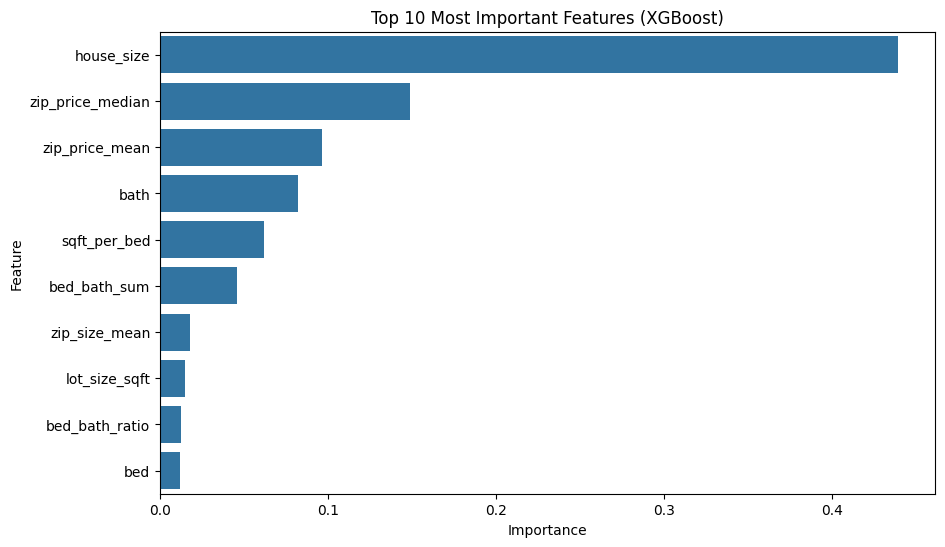

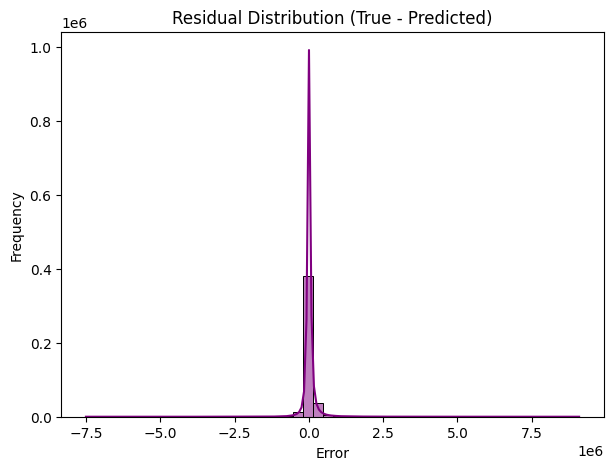


Model saved to: model_best.pkl


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")


def xgboost_best_model(df, export_path="model_best.pkl"):

    print("\n==============================================")
    print(" SIMPLE XGBOOST MODEL — BEST HYPERPARAMETERS ")
    print("==============================================")

    df = df.copy()

    df = df[(df["price"] > 1000) & (df["price"] < 10_000_000)]
    df = df.dropna(subset=["price"])

    # ------------------------------------
    # FEATURE ENGINEERING
    # ------------------------------------
    df["sqft_per_bed"] = df["house_size"] / df["bed"].replace(0, 1)
    df["bed_bath_sum"] = df["bed"] + df["bath"]
    df["bed_bath_ratio"] = df["bed"] / df["bath"].replace(0, 1)

    df["lot_size_sqft"] = df["acre_lot"] * 43560
    df["house_to_lot_ratio"] = df["house_size"] / df["lot_size_sqft"].replace(0, 1)

    df["years_since_2000"] = df["sold_year"] - 2000
    df["is_recent"] = (df["sold_year"] >= 2015).astype(int)

    df["month_sin"] = np.sin(2 * np.pi * df["sold_month"] / 12)
    df["month_cos"] = np.cos(2 * np.pi * df["sold_month"] / 12)

    df["city_size"] = df["city"].map(df["city"].value_counts())
    df["is_large_city"] = (df["city_size"] > 1000).astype(int)

    df["zip_price_mean"] = df.groupby("zip_code")["price"].transform("mean")
    df["zip_price_median"] = df.groupby("zip_code")["price"].transform("median")
    df["zip_size_mean"] = df.groupby("zip_code")["house_size"].transform("mean")
    df["zip_count"] = df.groupby("zip_code")["price"].transform("count")

    features = [
        "house_size", "bath", "bed",
        "sqft_per_bed", "bed_bath_ratio", "bed_bath_sum",
        "acre_lot", "lot_size_sqft", "house_to_lot_ratio",
        "city_size", "is_large_city",
        "years_since_2000", "is_recent",
        "month_sin", "month_cos",
        "zip_price_mean", "zip_price_median",
        "zip_size_mean", "zip_count", "zip_code"
    ]

    X = df[features].fillna(0)
    y = np.log1p(df["price"])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42
    )

    # ------------------------------------
    # BEST HYPERPARAMETERS
    # ------------------------------------
    best_params = {
        "n_estimators": 809,
        "learning_rate": 0.07799139066424228,
        "max_depth": 10,
        "min_child_weight": 4.061061163488145,
        "subsample": 0.5701048191854274,
        "colsample_bytree": 0.8581650610276089,
        "gamma": 0.00401540942931726,
        "reg_alpha": 0.77686055744257,
        "reg_lambda": 8.192269638825147,
        "tree_method": "hist",
        "n_jobs": -1,
        "random_state": 42
    }

    print("\nTraining model...")
    model = XGBRegressor(**best_params)
    model.fit(X_train, y_train)

    # ------------------------------------
    # PREDICTION + METRICS
    # ------------------------------------
    pred = np.expm1(model.predict(X_test))
    true = np.expm1(y_test)

    r2 = r2_score(true, pred)
    mae = mean_absolute_error(true, pred)
    mape = np.mean(np.abs((true - pred) / true)) * 100
    rmse = np.sqrt(mean_squared_error(true, pred))

    print("\n📈 PERFORMANCE:")
    print(f"R²   = {r2:.4f}")
    print(f"MAE  = ${mae:,.0f}")
    print(f"RMSE = ${rmse:,.0f}")
    print(f"MAPE = {mape:.2f}%")

    # ------------------------------------
    # TOP FEATURES
    # ------------------------------------
    importance = pd.DataFrame({
        "Feature": features,
        "Importance": model.feature_importances_
    }).sort_values("Importance", ascending=False)

    print("\n🔝 TOP 15 FEATURES:")
    print(importance.head(15))

    # BAR PLOT
    plt.figure(figsize=(10,6))
    sns.barplot(data=importance.head(10), x="Importance", y="Feature")
    plt.title("Top 10 Most Important Features (XGBoost)")
    plt.show()

    # ------------------------------------
    # RESIDUAL HEATMAP (Regression alternative to confusion matrix)
    # ------------------------------------
    residuals = true - pred

    plt.figure(figsize=(7,5))
    sns.histplot(residuals, bins=50, kde=True, color="purple")
    plt.title("Residual Distribution (True - Predicted)")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.show()


    # ------------------------------------
    # SAVE MODEL
    # ------------------------------------
    with open(export_path, "wb") as f:
        pickle.dump({
            "model": model,
            "features": features,
            "params": best_params,
            "importance": importance,
            "r2": r2,
            "mae": mae,
            "mape": mape,
            "rmse": rmse
        }, f)

    print(f"\nModel saved to: {export_path}")

    return model, r2, mae, mape, rmse, importance


# ---------------- MAIN ----------------
if __name__ == "__main__":
    df = pd.read_csv("cleaned_data.csv", low_memory=False)
    xgboost_best_model(df)


 **Testing with Example , the Input and the Output**

In [ ]:
import pickle
import numpy as np
import pandas as pd

with open("model_best.pkl", "rb") as f:
    saved = pickle.load(f)

model = saved["model"]
features = saved["features"]

# Example input
data = {
 "house_size": 2200,
 "bath": 2,
 "bed": 3,
 "sqft_per_bed": 2200/3,
 "bed_bath_ratio": 3/2,
 "bed_bath_sum": 5,
 "acre_lot": 0.5,
 "lot_size_sqft": 0.5 * 43560,
 "house_to_lot_ratio": 2200 / (0.5*43560),
 "city_size": 15200,
 "is_large_city": 1,
 "years_since_2000": 24,
 "is_recent": 1,
 "month_sin": -0.5,
 "month_cos": 0.86,
 "zip_price_mean": 430000,
 "zip_price_median": 410000,
 "zip_size_mean": 2000,
 "zip_count": 120,
 "zip_code": 92057
}

df_input = pd.DataFrame([data])[features]

# Predict
pred_log = model.predict(df_input)
price = np.expm1(pred_log)

print("Predicted price: $", price[0])


Predicted price: $ 557462.1


### **Predict the price after 10 years**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")


def train_time_forecasting_model(df, export_path="model_predict_10_years.pkl"):
    """
    Train a model that predicts property prices at future time points
    by incorporating time-based features and historical growth patterns.
    """

    print("\n" + "="*70)
    print("  TIME-BASED PRICE FORECASTING MODEL")
    print("="*70)

    df = df.copy()

    # Clean data
    df = df[(df["price"] > 1000) & (df["price"] < 10_000_000)]
    df = df.dropna(subset=["price"])

    print(f"\n✓ Loaded {len(df):,} properties")
    print(f"✓ Date range: {df['sold_year'].min()} - {df['sold_year'].max()}")

    # ------------------------------------
    # CALCULATE HISTORICAL GROWTH RATES
    # ------------------------------------
    print("\n📊 Analyzing historical price growth...")

    # Calculate year-over-year growth by zip code
    zip_growth = df.groupby(['zip_code', 'sold_year'])['price'].median().reset_index()
    zip_growth = zip_growth.sort_values(['zip_code', 'sold_year'])
    zip_growth['yoy_growth'] = zip_growth.groupby('zip_code')['price'].pct_change()

    # Average growth rate per zip
    zip_avg_growth = zip_growth.groupby('zip_code')['yoy_growth'].mean().fillna(0.03)  # Default 3%

    # Overall market growth rate
    yearly_prices = df.groupby('sold_year')['price'].median()
    overall_growth = yearly_prices.pct_change().mean()

    print(f"✓ Overall market growth rate: {overall_growth*100:.2f}% per year")
    print(f"✓ Calculated growth rates for {len(zip_avg_growth)} zip codes")

    # ------------------------------------
    # FEATURE ENGINEERING
    # ------------------------------------
    print("\n🔧 Engineering features...")

    # Basic ratios
    df["sqft_per_bed"] = df["house_size"] / df["bed"].replace(0, 1)
    df["bed_bath_sum"] = df["bed"] + df["bath"]
    df["bed_bath_ratio"] = df["bed"] / df["bath"].replace(0, 1)

    # Lot features
    df["lot_size_sqft"] = df["acre_lot"] * 43560
    df["house_to_lot_ratio"] = df["house_size"] / df["lot_size_sqft"].replace(0, 1)

    # Time features (CRITICAL for forecasting)
    df["years_since_2000"] = df["sold_year"] - 2000
    df["is_recent"] = (df["sold_year"] >= 2015).astype(int)

    # Add decade feature for capturing long-term trends
    df["decade"] = (df["sold_year"] // 10) * 10

    # Cyclical time encoding
    df["month_sin"] = np.sin(2 * np.pi * df["sold_month"] / 12)
    df["month_cos"] = np.cos(2 * np.pi * df["sold_month"] / 12)

    # Location features
    df["city_size"] = df["city"].map(df["city"].value_counts())
    df["is_large_city"] = (df["city_size"] > 1000).astype(int)

    # Zip-level aggregations
    df["zip_price_mean"] = df.groupby("zip_code")["price"].transform("mean")
    df["zip_price_median"] = df.groupby("zip_code")["price"].transform("median")
    df["zip_size_mean"] = df.groupby("zip_code")["house_size"].transform("mean")
    df["zip_count"] = df.groupby("zip_code")["price"].transform("count")

    # Add historical growth rate as feature
    df["zip_growth_rate"] = df["zip_code"].map(zip_avg_growth).fillna(overall_growth)

    # Price per sqft (important for quality)
    df["price_per_sqft"] = df["price"] / df["house_size"]

    features = [
        "house_size", "bath", "bed",
        "sqft_per_bed", "bed_bath_ratio", "bed_bath_sum",
        "acre_lot", "lot_size_sqft", "house_to_lot_ratio",
        "city_size", "is_large_city",
        "years_since_2000", "is_recent", "decade",
        "month_sin", "month_cos",
        "zip_price_mean", "zip_price_median",
        "zip_size_mean", "zip_count", "zip_code",
        "zip_growth_rate"
    ]

    X = df[features].fillna(0)
    y = np.log1p(df["price"])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42
    )

    # ------------------------------------
    # TRAIN MODEL
    # ------------------------------------
    print("\n🤖 Training XGBoost model...")

    best_params = {
        "n_estimators": 809,
        "learning_rate": 0.07799139066424228,
        "max_depth": 10,
        "min_child_weight": 4.061061163488145,
        "subsample": 0.5701048191854274,
        "colsample_bytree": 0.8581650610276089,
        "gamma": 0.00401540942931726,
        "reg_alpha": 0.77686055744257,
        "reg_lambda": 8.192269638825147,
        "tree_method": "hist",
        "n_jobs": -1,
        "random_state": 42
    }

    model = XGBRegressor(**best_params)
    model.fit(X_train, y_train)

    # ------------------------------------
    # EVALUATE
    # ------------------------------------
    print("\n📊 Evaluating model...")

    pred = np.expm1(model.predict(X_test))
    true = np.expm1(y_test)

    r2 = r2_score(true, pred)
    mae = mean_absolute_error(true, pred)
    mape = np.mean(np.abs((true - pred) / true)) * 100
    rmse = np.sqrt(mean_squared_error(true, pred))

    print("\n📈 PERFORMANCE METRICS:")
    print(f"  R²   = {r2:.4f}")
    print(f"  MAE  = ${mae:,.0f}")
    print(f"  RMSE = ${rmse:,.0f}")
    print(f"  MAPE = {mape:.2f}%")

    # ------------------------------------
    # FEATURE IMPORTANCE
    # ------------------------------------
    importance = pd.DataFrame({
        "Feature": features,
        "Importance": model.feature_importances_
    }).sort_values("Importance", ascending=False)

    print("\n🔝 TOP 15 FEATURES:")
    print(importance.head(15).to_string(index=False))

    # Visualizations
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.barplot(data=importance.head(10), x="Importance", y="Feature", palette="viridis")
    plt.title("Top 10 Most Important Features")

    plt.subplot(1, 2, 2)
    residuals = true - pred
    sns.histplot(residuals, bins=50, kde=True, color="purple")
    plt.title("Residual Distribution")
    plt.xlabel("Error ($)")

    plt.tight_layout()
    plt.savefig("model_performance.png", dpi=300, bbox_inches='tight')
    print("\n💾 Saved: model_performance.png")
    plt.show()

    # ------------------------------------
    # SAVE MODEL WITH METADATA
    # ------------------------------------
    print(f"\n💾 Saving model to {export_path}...")

    with open(export_path, "wb") as f:
        pickle.dump({
            "model": model,
            "features": features,
            "params": best_params,
            "importance": importance,
            "metrics": {
                "r2": r2,
                "mae": mae,
                "mape": mape,
                "rmse": rmse
            },
            "growth_rates": {
                "overall_growth": overall_growth,
                "zip_growth_rates": zip_avg_growth.to_dict()
            },
            "reference_year": int(df['sold_year'].max()),
            "avg_inflation": 0.025  # 2.5% annual inflation
        }, f)

    print("✅ Model saved successfully!")

    return model, features, r2, mae


# ==========================================
# PRICE FORECASTING CLASS
# ==========================================

class PropertyPriceForecaster:
    """
    Predict property prices for 1, 5, and 10 years using:
    - Machine learning model
    - Historical growth rates
    - Inflation adjustment
    - Market trends
    """

    def __init__(self, model_path="model_predict_10_years.pkl"):
        """Load trained model."""
        with open(model_path, "rb") as f:
            saved = pickle.load(f)

        self.model = saved["model"]
        self.features = saved["features"]
        self.metrics = saved["metrics"]
        self.growth_rates = saved["growth_rates"]
        self.reference_year = saved["reference_year"]
        self.avg_inflation = saved.get("avg_inflation", 0.025)

        print(f"✓ Model loaded (R² = {self.metrics['r2']:.4f})")
        print(f"✓ Reference year: {self.reference_year}")


    def predict_prices(self, property_data, current_year=None):
        """
        Predict prices for 1, 5, and 10 years ahead.

        Returns dict with current, 1yr, 5yr, 10yr predictions
        """

        if current_year is None:
            current_year = property_data.get("sold_year", self.reference_year)

        # Get base prediction for current year
        current_price = self._predict_single_year(property_data, current_year)

        # Get zip-specific growth rate (or use overall)
        zip_code = property_data.get("zip_code")
        growth_rate = self.growth_rates["zip_growth_rates"].get(
            zip_code,
            self.growth_rates["overall_growth"]
        )

        # Combine growth rate with inflation
        combined_growth = growth_rate + self.avg_inflation

        # Cap growth rate at reasonable bounds (2% - 8% annually)
        combined_growth = np.clip(combined_growth, 0.02, 0.08)

        # Predict future prices using compound growth
        price_1yr = self._predict_single_year(property_data, current_year + 1)
        price_5yr = self._predict_single_year(property_data, current_year + 5)
        price_10yr = self._predict_single_year(property_data, current_year + 10)

        # Apply growth adjustment (blend model prediction with trend)
        weight = 0.7  # 70% model, 30% trend

        price_1yr_trend = current_price * (1 + combined_growth) ** 1
        price_5yr_trend = current_price * (1 + combined_growth) ** 5
        price_10yr_trend = current_price * (1 + combined_growth) ** 10

        # Blend predictions
        price_1yr_final = weight * price_1yr + (1 - weight) * price_1yr_trend
        price_5yr_final = weight * price_5yr + (1 - weight) * price_5yr_trend
        price_10yr_final = weight * price_10yr + (1 - weight) * price_10yr_trend

        return {
            "current_price": round(current_price, 2),
            "price_1_year": round(price_1yr_final, 2),
            "price_5_year": round(price_5yr_final, 2),
            "price_10_year": round(price_10yr_final, 2),
            "growth_rate_used": round(combined_growth * 100, 2),
            "current_year": current_year
        }


    def _predict_single_year(self, data, target_year):
        """Predict price for a specific year."""

        # Engineer features for target year
        engineered = self._engineer_features(data, target_year)

        # Create input
        X_input = pd.DataFrame([engineered])[self.features]

        # Predict
        log_price = self.model.predict(X_input)
        return float(np.expm1(log_price)[0])


    def _engineer_features(self, data, year):
        """Engineer all features for a specific year."""

        house_size = data.get("house_size", 2000)
        bed = max(data.get("bed", 3), 1)
        bath = max(data.get("bath", 2), 1)
        acre_lot = max(data.get("acre_lot", 0.2), 0.01)

        sqft_per_bed = house_size / bed
        bed_bath_sum = bed + bath
        bed_bath_ratio = bed / bath

        lot_size_sqft = acre_lot * 43560
        house_to_lot_ratio = house_size / lot_size_sqft

        years_since_2000 = year - 2000
        is_recent = 1 if year >= 2015 else 0
        decade = (year // 10) * 10

        month_sin = np.sin(2 * np.pi * 6 / 12)
        month_cos = np.cos(2 * np.pi * 6 / 12)

        city_size = data.get("city_size", 5000)
        is_large_city = 1 if city_size > 1000 else 0

        zip_code = data.get("zip_code", 90001)
        zip_price_mean = data.get("zip_price_mean", house_size * 150)
        zip_price_median = data.get("zip_price_median", house_size * 145)
        zip_size_mean = data.get("zip_size_mean", house_size)
        zip_count = data.get("zip_count", 100)

        zip_growth_rate = self.growth_rates["zip_growth_rates"].get(
            zip_code,
            self.growth_rates["overall_growth"]
        )

        return {
            "house_size": house_size,
            "bath": bath,
            "bed": bed,
            "sqft_per_bed": sqft_per_bed,
            "bed_bath_ratio": bed_bath_ratio,
            "bed_bath_sum": bed_bath_sum,
            "acre_lot": acre_lot,
            "lot_size_sqft": lot_size_sqft,
            "house_to_lot_ratio": house_to_lot_ratio,
            "city_size": city_size,
            "is_large_city": is_large_city,
            "years_since_2000": years_since_2000,
            "is_recent": is_recent,
            "decade": decade,
            "month_sin": month_sin,
            "month_cos": month_cos,
            "zip_price_mean": zip_price_mean,
            "zip_price_median": zip_price_median,
            "zip_size_mean": zip_size_mean,
            "zip_count": zip_count,
            "zip_code": zip_code,
            "zip_growth_rate": zip_growth_rate
        }


# ==========================================
# MAIN
# ==========================================

if __name__ == "__main__":

    print("\n" + "="*70)
    print("  CHOOSE MODE:")
    print("="*70)
    print("  1. Train new forecasting model")
    print("  2. Use existing model for predictions")
    print("="*70)

    choice = input("\nChoice (1 or 2): ")

    if choice == "1":
        # TRAIN MODEL
        df = pd.read_csv("cleaned_data.csv", low_memory=False)
        train_time_forecasting_model(df)

    else:
        # USE MODEL
        forecaster = PropertyPriceForecaster("model_predict_10_years.pkl")

        print("\n" + "="*70)
        print("  ENTER PROPERTY DETAILS")
        print("="*70)

        property_info = {
            "house_size": float(input("🏠 House size (sqft): ")),
            "bed": int(input("🛏️  Bedrooms: ")),
            "bath": float(input("🛁 Bathrooms: ")),
            "acre_lot": float(input("📏 Lot size (acres): ")),
            "zip_code": int(input("📮 ZIP code: ")),
            "sold_year": int(input("📅 Current year (e.g., 2024): "))
        }

        # Get predictions
        results = forecaster.predict_prices(property_info)

        print("\n" + "="*70)
        print("  PRICE FORECAST")
        print("="*70)
        print(f"  Current ({results['current_year']}):  ${results['current_price']:>12,.0f}")
        print(f"  1 Year Ahead:         ${results['price_1_year']:>12,.0f}  (+{((results['price_1_year']/results['current_price']-1)*100):.1f}%)")
        print(f"  5 Years Ahead:        ${results['price_5_year']:>12,.0f}  (+{((results['price_5_year']/results['current_price']-1)*100):.1f}%)")
        print(f"  10 Years Ahead:       ${results['price_10_year']:>12,.0f}  (+{((results['price_10_year']/results['current_price']-1)*100):.1f}%)")
        print("="*70)
        print(f"  Growth Rate Used: {results['growth_rate_used']:.2f}% annually")
        print("="*70)


  CHOOSE MODE:
  1. Train new forecasting model
  2. Use existing model for predictions

Choice (1 or 2): 2
✓ Model loaded (R² = 0.8393)
✓ Reference year: 2026

  ENTER PROPERTY DETAILS
🏠 House size (sqft): 5000
🛏️  Bedrooms: 3
🛁 Bathrooms: 2
📏 Lot size (acres): 1000
📮 ZIP code: 601
📅 Current year (e.g., 2024): 2024

  PRICE FORECAST
  Current (2024):  $   1,003,368
  1 Year Ahead:         $   1,027,448  (+2.4%)
  5 Years Ahead:        $   1,144,640  (+14.1%)
  10 Years Ahead:       $   1,352,216  (+34.8%)
  Growth Rate Used: 8.00% annually


### **real estate investment recommendation system.**

In [ ]:
import numpy as np
import pandas as pd
import pickle
import math
from pathlib import Path


class RealEstateInvestmentAdvisor:
    """
    Flask-ready real estate investment recommendation system.
    Export this class to use in your web application.
    """

    def __init__(self, model_path="model_best.pkl", data_path="cleaned_data.csv"):
        """Load the trained model and dataset."""

        # Load model
        with open(model_path, "rb") as f:
            saved = pickle.load(f)

        self.model = saved["model"]
        self.features = saved["features"]

        # Load data
        self.df = pd.read_csv(data_path, low_memory=False)

        # Clean data: remove invalid prices
        self.df = self.df[self.df['price'] > 0]

        print(f"✓ Loaded model with {len(self.features)} features")
        print(f"✓ Loaded {len(self.df):,} valid properties")

        # Pre-compute aggregated features
        self._precompute_features()


    def _precompute_features(self):
        """Pre-compute city and zip-level aggregated features."""

        # City-level aggregations
        city_stats = self.df.groupby('city').agg(
            city_size=('price', 'count')
        ).reset_index()

        # Zip-level aggregations
        zip_stats = self.df.groupby('zip_code').agg(
            zip_price_mean=('price', 'mean'),
            zip_price_median=('price', 'median'),
            zip_size_mean=('house_size', 'mean'),
            zip_count=('price', 'count')
        ).reset_index()

        # Merge back
        self.df = self.df.merge(city_stats, on='city', how='left')
        self.df = self.df.merge(zip_stats, on='zip_code', how='left')

        # Create derived features
        self.df['is_large_city'] = (self.df['city_size'] >= 1000).astype(int)

        # Fill NaN values with safe defaults
        self.df['city_size'] = self.df['city_size'].fillna(1)
        self.df['is_large_city'] = self.df['is_large_city'].fillna(0)
        self.df['zip_price_mean'] = self.df['zip_price_mean'].fillna(self.df['price'].mean())
        self.df['zip_price_median'] = self.df['zip_price_median'].fillna(self.df['price'].median())
        self.df['zip_size_mean'] = self.df['zip_size_mean'].fillna(self.df['house_size'].mean())
        self.df['zip_count'] = self.df['zip_count'].fillna(1)


    def forecast_price(self, row, years_ahead):
        """Predict future price for any property."""

        future_year = row["sold_year"] + years_ahead
        sold_month = 6

        # Engineer all features
        engineered = {
            **row,
            "sqft_per_bed": row["house_size"] / row["bed"] if row["bed"] > 0 else 0,
            "bed_bath_sum": row["bed"] + row["bath"],
            "bed_bath_ratio": (row["bed"] / row["bath"]) if row["bath"] > 0 else 0,
            "lot_size_sqft": row["acre_lot"] * 43560,
            "house_to_lot_ratio": (
                row["house_size"] / (row["acre_lot"] * 43560)
                if row["acre_lot"] > 0 else 0
            ),
            "years_since_2000": future_year - 2000,
            "is_recent": 1 if future_year >= 2015 else 0,
            "month_sin": math.sin(2 * math.pi * sold_month / 12),
            "month_cos": math.cos(2 * math.pi * sold_month / 12),
            "city_size": row.get("city_size", 1),
            "is_large_city": row.get("is_large_city", 0),
            "zip_price_mean": row.get("zip_price_mean", row["price"]),
            "zip_price_median": row.get("zip_price_median", row["price"]),
            "zip_size_mean": row.get("zip_size_mean", row["house_size"]),
            "zip_count": row.get("zip_count", 1),
        }

        df_input = pd.DataFrame([engineered])[self.features]
        log_pred = self.model.predict(df_input)
        return float(np.expm1(log_pred)[0])


    def compute_risk(self, zip_code, df_subset=None):
        """Calculate price volatility risk for any zip code."""

        if df_subset is None:
            df_subset = self.df

        zip_prices = df_subset[df_subset["zip_code"] == zip_code]["price"]

        if len(zip_prices) < 5:
            return 0.10

        mean_price = zip_prices.mean()
        if mean_price == 0:
            return 0.10

        return float(zip_prices.std() / mean_price)


    def recommend_investments(self, budget, state=None, city=None,
                             min_beds=None, max_beds=None, min_baths=None,
                             top_n=10, verbose=True):
        """
        Get investment recommendations for ANY criteria.
        Flask-ready with proper error handling.

        Parameters:
        -----------
        budget : float
            Maximum price
        state : str, optional
            Filter by state
        city : str, optional
            Filter by city
        min_beds : int, optional
            Minimum bedrooms
        max_beds : int, optional
            Maximum bedrooms
        min_baths : float, optional
            Minimum bathrooms
        top_n : int
            Number of recommendations (default 10)
        verbose : bool
            Print progress (set False for Flask)

        Returns:
        --------
        dict with 'success', 'data', 'message', 'total_analyzed'
        """

        df = self.df.copy()

        if verbose:
            print(f"\n🔍 Searching properties...")

        # Apply filters
        if state and state.strip():
            df = df[df["state"].str.lower() == state.lower()]
            if verbose:
                print(f"  → Filtered by state '{state}': {len(df):,} properties")

        if city and city.strip():
            df = df[df["city"].str.lower() == city.lower()]
            if verbose:
                print(f"  → Filtered by city '{city}': {len(df):,} properties")

        if min_beds:
            df = df[df["bed"] >= min_beds]
            if verbose:
                print(f"  → Filtered by min beds {min_beds}: {len(df):,} properties")

        if max_beds:
            df = df[df["bed"] <= max_beds]
            if verbose:
                print(f"  → Filtered by max beds {max_beds}: {len(df):,} properties")

        if min_baths:
            df = df[df["bath"] >= min_baths]
            if verbose:
                print(f"  → Filtered by min baths {min_baths}: {len(df):,} properties")

        # Budget filter
        df = df[df["price"] <= budget]

        if verbose:
            print(f"  → Under budget ${budget:,.0f}: {len(df):,} properties")

        if df.empty:
            return {
                'success': False,
                'data': [],
                'message': 'No properties found matching your criteria.',
                'total_analyzed': 0
            }

        # For large datasets, sample to prevent timeout
        MAX_ANALYZE = 5000
        if len(df) > MAX_ANALYZE:
            if verbose:
                print(f"  → Sampling {MAX_ANALYZE} properties for faster analysis")
            df = df.sample(n=MAX_ANALYZE, random_state=42)

        if verbose:
            print(f"\n⏳ Analyzing {len(df):,} properties...")

        results = []

        for idx, (_, row) in enumerate(df.iterrows()):
            try:
                # Progress for large datasets
                if verbose and (idx + 1) % 1000 == 0:
                    print(f"  ... {idx + 1:,}/{len(df):,}")

                row_dict = row.to_dict()
                current = row["price"]

                # Skip if price is invalid
                if current <= 0:
                    continue

                # Forecast
                p1 = self.forecast_price(row_dict, 1)
                p5 = self.forecast_price(row_dict, 5)
                p10 = self.forecast_price(row_dict, 10)

                # Calculate ROI
                roi_1 = (p1 - current) / current * 100
                roi_5 = (p5 - current) / current * 100
                roi_10 = (p10 - current) / current * 100

                risk = self.compute_risk(row["zip_code"], df)

                results.append({
                    "state": row["state"],
                    "city": row["city"],
                    "zip_code": int(row["zip_code"]),
                    "beds": int(row["bed"]),
                    "baths": float(row["bath"]),
                    "house_size": int(row["house_size"]),
                    "current_price": float(current),
                    "price_1yr": float(p1),
                    "price_5yr": float(p5),
                    "price_10yr": float(p10),
                    "roi_1_year": float(roi_1),
                    "roi_5_year": float(roi_5),
                    "roi_10_year": float(roi_10),
                    "risk": float(risk),
                    "risk_adjusted_roi": float(roi_10 / (1 + risk))
                })

            except Exception as e:
                # Skip problematic properties
                if verbose:
                    print(f"  ⚠ Skipped property: {e}")
                continue

        if not results:
            return {
                'success': False,
                'data': [],
                'message': 'Could not analyze any properties.',
                'total_analyzed': 0
            }

        df_results = pd.DataFrame(results)
        df_results = df_results.sort_values("roi_10_year", ascending=False)

        if verbose:
            print(f"\n✓ Analysis complete!")

        return {
            'success': True,
            'data': df_results.head(top_n).to_dict('records'),
            'message': f'Found {len(results)} investment opportunities',
            'total_analyzed': len(results)
        }


    def get_available_states(self):
        """Get list of all available states."""
        return sorted(self.df['state'].unique().tolist())


    def get_cities_by_state(self, state):
        """Get cities in a specific state."""
        cities = self.df[self.df['state'].str.lower() == state.lower()]['city'].unique()
        return sorted(cities.tolist())


    def get_stats(self):
        """Get dataset statistics."""
        return {
            'total_properties': len(self.df),
            'states': len(self.df['state'].unique()),
            'cities': len(self.df['city'].unique()),
            'price_range': {
                'min': float(self.df['price'].min()),
                'max': float(self.df['price'].max()),
                'mean': float(self.df['price'].mean())
            }
        }


# ==========================================
# EXPORT FOR FLASK
# ==========================================

def create_advisor_pickle(output_path="real_estate_advisor.pkl"):
    """
    Create a pickle file ready for Flask deployment.
    This bundles everything needed for web app.
    """
    print("🔧 Creating Flask-ready advisor...")

    advisor = RealEstateInvestmentAdvisor()

    # Save the entire advisor object
    with open(output_path, "wb") as f:
        pickle.dump(advisor, f)

    print(f"✅ Saved to {output_path}")
    print(f"📦 File size: {Path(output_path).stat().st_size / 1024 / 1024:.2f} MB")
    print("\n📝 Usage in Flask:")
    print("""
    # In your Flask app:
    import pickle

    with open('real_estate_advisor.pkl', 'rb') as f:
        advisor = pickle.load(f)

    # Use it:
    results = advisor.recommend_investments(
        budget=500000,
        state="California",
        top_n=10,
        verbose=False  # Disable prints in web app
    )

    return jsonify(results)
    """)

    return advisor


# ==========================================
# USAGE
# ==========================================

if __name__ == "__main__":

    print("="*60)
    print("REAL ESTATE ADVISOR - FLASK EXPORT")
    print("="*60)

    choice = input("\n1. Test advisor locally\n2. Export for Flask\n\nChoice (1 or 2): ")

    if choice == "2":
        # Export for Flask
        advisor = create_advisor_pickle("real_estate_advisor.pkl")

    else:
        # Test locally
        advisor = RealEstateInvestmentAdvisor()

        print("\n" + "="*50)
        print("🏠 REAL ESTATE INVESTMENT ADVISOR - TEST")
        print("="*50)

        budget = float(input("\n💰 Budget (USD): "))
        state = input("📍 State (optional): ")

        min_beds_input = input("🛏️  Min bedrooms (optional): ")
        min_beds = int(min_beds_input) if min_beds_input.strip() else None

        results = advisor.recommend_investments(
            budget=budget,
            state=state if state.strip() else None,
            min_beds=min_beds,
            top_n=10,
            verbose=True
        )

        if results['success']:
            print("\n" + "="*50)
            print("🎯 TOP RECOMMENDATIONS")
            print("="*50)

            df_display = pd.DataFrame(results['data'])
            print(df_display[['city', 'beds', 'current_price', 'roi_10_year']].to_string(index=False))

            print(f"\n✓ Total analyzed: {results['total_analyzed']:,}")
        else:
            print(f"\n❌ {results['message']}")

    print("\n✅ Done!")

REAL ESTATE ADVISOR - FLASK EXPORT

1. Test advisor locally
2. Export for Flask

Choice (1 or 2): 2
🔧 Creating Flask-ready advisor...
✓ Loaded model with 20 features
✓ Loaded 2,224,561 valid properties
✅ Saved to real_estate_advisor.pkl
📦 File size: 376.06 MB

📝 Usage in Flask:

    # In your Flask app:
    import pickle
    
    with open('real_estate_advisor.pkl', 'rb') as f:
        advisor = pickle.load(f)
    
    # Use it:
    results = advisor.recommend_investments(
        budget=500000,
        state="California",
        top_n=10,
        verbose=False  # Disable prints in web app
    )
    
    return jsonify(results)
    

✅ Done!


### **Objectif Clustering for houses main column is Street**

***Assign ZIP centroid + jitter to streets***

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("cleaned_data.csv")
zipdf = pd.read_csv("zip_latlng.csv")[["zip", "lat", "lng"]]

# Merge ZIP coordinates into your dataset
df = df.merge(zipdf, left_on="zip_code", right_on="zip", how="left")

# Add small random jitter to separate streets within same ZIP
np.random.seed(42)
df["lat_jitter"] = df["lat"] + np.random.normal(0, 0.002, size=len(df))
df["lng_jitter"] = df["lng"] + np.random.normal(0, 0.002, size=len(df))

df.to_csv("data_with_street_coords.csv", index=False)
print("Street coordinates assigned FAST.")


Street coordinates assigned FAST.


***Test KMeans vs HDBSCAN for street zones***

In [ ]:
""" Crushed after 1,30 h :(
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import hdbscan
import pandas as pd
import numpy as np
import time
import pickle

df = pd.read_csv("data_with_street_coords.csv")

# --------------------------
# FIX: Remove missing coords
# --------------------------
df = df.dropna(subset=["lat_jitter", "lng_jitter"]).reset_index(drop=True)

coords = df[["lat_jitter", "lng_jitter"]].to_numpy()

results = {}

# ---- KMEANS ----
start = time.time()
k = 30  # try 30 clusters

kmeans = KMeans(n_clusters=k, random_state=42)
labels_k = kmeans.fit_predict(coords)
score_k = silhouette_score(coords, labels_k)
time_k = time.time() - start

results["kmeans"] = {"score": score_k, "time": time_k, "model": kmeans}


# ---- HDBSCAN ----
start = time.time()

clusterer = hdbscan.HDBSCAN(min_cluster_size=200)
labels_h = clusterer.fit_predict(coords)

# FIX: check mask only if not all noise
mask = labels_h != -1
if mask.sum() > 10:
    score_h = silhouette_score(coords[mask], labels_h[mask])
else:
    score_h = -999  # invalid, means HDBSCAN failed

time_h = time.time() - start

results["hdbscan"] = {"score": score_h, "time": time_h, "model": clusterer}


# ---- BEST MODEL ----
best = max(results, key=lambda m: results[m]["score"])
best_model = results[best]["model"]

print("\n=== STREET CLUSTERING RESULTS ===")
print("KMeans  → Score:", results["kmeans"]["score"], " Time:", time_k)
print("HDBSCAN → Score:", results["hdbscan"]["score"], " Time:", time_h)
print("BEST MODEL =", best)

# ---- SAVE MODEL ----
with open("best_street_cluster_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

df["street_cluster"] = (
    best_model.fit_predict(coords) if best == "hdbscan" else best_model.predict(coords)
)

df.to_csv("clustered_streets.csv", index=False)

print("\nClustered streets saved to clustered_streets.csv")
"""

KeyboardInterrupt: 

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import pickle
import time
from tqdm import tqdm
from collections import defaultdict

print("="*60)
print("  STREET-LEVEL CLUSTERING")
print("  (Each street gets its own clusters)")
print("="*60)

# ==========================================
# CONFIGURATION
# ==========================================

# DBSCAN parameters (for clustering houses on same street)
EPS_KM = 0.05  # 50 meters radius (in km)
MIN_SAMPLES = 2  # Minimum 2 houses to form a cluster

# Convert km to degrees (approximate)
# 1 degree latitude ≈ 111 km
# 1 degree longitude ≈ 111 km * cos(latitude)
# For simplicity, using average: 1 degree ≈ 111 km
EPS_DEGREES = EPS_KM / 111.0

print(f"\n⚙️  Configuration:")
print(f"   Clustering radius: {EPS_KM*1000:.0f} meters")
print(f"   Min houses per cluster: {MIN_SAMPLES}")

# ==========================================
# LOAD DATA
# ==========================================

print("\n📂 Loading data...")
df = pd.read_csv("data_with_street_coords.csv")
print(f"✓ Loaded {len(df):,} rows")

# Check for street column
if 'street' not in df.columns:
    print("❌ ERROR: 'street' column not found!")
    print(f"   Available columns: {', '.join(df.columns)}")
    exit(1)

# Remove missing coordinates or streets
df = df.dropna(subset=["lat_jitter", "lng_jitter", "street"]).reset_index(drop=True)
print(f"✓ After removing NaN: {len(df):,} rows")

# ==========================================
# STREET ANALYSIS
# ==========================================

print("\n🏘️  Analyzing streets...")
street_counts = df['street'].value_counts()
print(f"✓ Total unique streets: {len(street_counts):,}")
print(f"✓ Houses per street (avg): {street_counts.mean():.1f}")
print(f"✓ Houses per street (median): {street_counts.median():.0f}")

print("\n📊 Top 10 streets by property count:")
print(street_counts.head(10))

# ==========================================
# CLUSTERING STRATEGY
# ==========================================

print("\n🎯 Clustering Strategy:")
print("   For each street:")
print("   1. Extract all houses on that street")
print("   2. Cluster by proximity (DBSCAN)")
print("   3. Assign unique cluster IDs")
print("\n   This creates geographic clusters within each street")

# ==========================================
# PERFORM CLUSTERING PER STREET
# ==========================================

print("\n🤖 Clustering houses by street...")

# Initialize cluster column
df['street_cluster'] = -1
df['within_street_cluster'] = -1  # Cluster ID within that street

global_cluster_id = 0
street_stats = []

start_time = time.time()

# Group by street and cluster
for street_name, group in tqdm(df.groupby('street'), desc="Processing streets"):
    if len(group) < MIN_SAMPLES:
        # Not enough houses to cluster - assign as noise
        df.loc[group.index, 'street_cluster'] = -1
        df.loc[group.index, 'within_street_cluster'] = 0
        continue

    # Get coordinates for this street
    coords = group[['lat_jitter', 'lng_jitter']].to_numpy()

    # Cluster houses on this street by proximity
    clustering = DBSCAN(
        eps=EPS_DEGREES,
        min_samples=MIN_SAMPLES,
        metric='euclidean'
    ).fit(coords)

    labels = clustering.labels_

    # Count clusters (excluding noise = -1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    # Assign global cluster IDs
    for label in set(labels):
        if label == -1:
            # Noise points
            mask = labels == -1
            df.loc[group.index[mask], 'street_cluster'] = -1
            df.loc[group.index[mask], 'within_street_cluster'] = -1
        else:
            # Valid cluster
            mask = labels == label
            df.loc[group.index[mask], 'street_cluster'] = global_cluster_id
            df.loc[group.index[mask], 'within_street_cluster'] = label
            global_cluster_id += 1

    # Store stats
    street_stats.append({
        'street': street_name,
        'total_houses': len(group),
        'clusters_found': n_clusters,
        'noise_points': n_noise,
        'avg_per_cluster': len(group) / n_clusters if n_clusters > 0 else 0
    })

elapsed = time.time() - start_time

print(f"\n✓ Clustering completed in {elapsed:.2f} seconds")
print(f"✓ Total clusters created: {global_cluster_id:,}")

# ==========================================
# ANALYZE RESULTS
# ==========================================

print("\n📊 Clustering Results:")

# Overall stats
n_clustered = (df['street_cluster'] != -1).sum()
n_noise = (df['street_cluster'] == -1).sum()

print(f"   Clustered houses: {n_clustered:,} ({n_clustered/len(df)*100:.1f}%)")
print(f"   Noise (isolated): {n_noise:,} ({n_noise/len(df)*100:.1f}%)")
print(f"   Total clusters:   {global_cluster_id:,}")
print(f"   Avg houses/cluster: {n_clustered/global_cluster_id:.1f}")

# Cluster size distribution
cluster_sizes = df[df['street_cluster'] != -1]['street_cluster'].value_counts()
print(f"\n📈 Cluster Size Distribution:")
print(f"   Min size:    {cluster_sizes.min()}")
print(f"   Max size:    {cluster_sizes.max()}")
print(f"   Median size: {cluster_sizes.median():.0f}")
print(f"   Mean size:   {cluster_sizes.mean():.1f}")

# Street-level stats
stats_df = pd.DataFrame(street_stats)
stats_df = stats_df[stats_df['clusters_found'] > 0].sort_values('total_houses', ascending=False)

print(f"\n🏘️  Top 10 Streets by Property Count:")
print(stats_df.head(10)[['street', 'total_houses', 'clusters_found', 'avg_per_cluster']].to_string(index=False))

# Streets with most clusters
most_clustered = stats_df.sort_values('clusters_found', ascending=False).head(10)
print(f"\n📍 Streets with Most Clusters:")
print(most_clustered[['street', 'total_houses', 'clusters_found']].to_string(index=False))

# ==========================================
# SAVE RESULTS
# ==========================================

print("\n💾 Saving results...")

# Save main dataframe with clusters
df.to_csv("clustered_by_street.csv", index=False)
print("✓ Saved: clustered_by_street.csv")

# Save street statistics
stats_df.to_csv("street_clustering_stats.csv", index=False)
print("✓ Saved: street_clustering_stats.csv")

# Save cluster centroids
cluster_centroids = []
for cluster_id in df[df['street_cluster'] != -1]['street_cluster'].unique():
    cluster_data = df[df['street_cluster'] == cluster_id]
    centroid = {
        'cluster_id': cluster_id,
        'street': cluster_data['street'].iloc[0],
        'lat': cluster_data['lat_jitter'].mean(),
        'lng': cluster_data['lng_jitter'].mean(),
        'count': len(cluster_data)
    }
    cluster_centroids.append(centroid)

centroids_df = pd.DataFrame(cluster_centroids)
centroids_df.to_csv("street_cluster_centroids.csv", index=False)
print("✓ Saved: street_cluster_centroids.csv")

# Save model parameters and metadata
metadata = {
    'eps_km': EPS_KM,
    'eps_degrees': EPS_DEGREES,
    'min_samples': MIN_SAMPLES,
    'total_clusters': global_cluster_id,
    'total_houses': len(df),
    'clustered_houses': n_clustered,
    'noise_points': n_noise,
    'clustering_time': elapsed,
    'unique_streets': len(street_counts)
}

with open("street_clustering_metadata.pkl", "wb") as f:
    pickle.dump(metadata, f)
print("✓ Saved: street_clustering_metadata.pkl")

# ==========================================
# QUALITY CHECKS
# ==========================================

print("\n🔍 Quality Checks:")

# Check 1: Every cluster should be on a single street
print("   Checking cluster-street consistency...")
cluster_street_check = df[df['street_cluster'] != -1].groupby('street_cluster')['street'].nunique()
multi_street_clusters = (cluster_street_check > 1).sum()
if multi_street_clusters > 0:
    print(f"   ⚠️  WARNING: {multi_street_clusters} clusters span multiple streets!")
else:
    print("   ✓ All clusters are within single streets")

# Check 2: Cluster geographic spread
print("   Analyzing cluster geographic spread...")
spreads = []
for cluster_id in df[df['street_cluster'] != -1]['street_cluster'].unique()[:100]:  # Sample 100
    cluster_data = df[df['street_cluster'] == cluster_id]
    lat_spread = cluster_data['lat_jitter'].max() - cluster_data['lat_jitter'].min()
    lng_spread = cluster_data['lng_jitter'].max() - cluster_data['lng_jitter'].min()
    spreads.append(max(lat_spread, lng_spread) * 111)  # Convert to km

if spreads:
    print(f"   ✓ Avg cluster diameter: {np.mean(spreads):.3f} km")
    print(f"   ✓ Max cluster diameter: {np.max(spreads):.3f} km")

# ==========================================
# SUMMARY
# ==========================================

print("\n" + "="*60)
print("  ✅ STREET-LEVEL CLUSTERING COMPLETE!")
print("="*60)
print(f"  Total Properties:        {len(df):,}")
print(f"  Unique Streets:          {len(street_counts):,}")
print(f"  Total Clusters:          {global_cluster_id:,}")
print(f"  Clustered Properties:    {n_clustered:,} ({n_clustered/len(df)*100:.1f}%)")
print(f"  Isolated Properties:     {n_noise:,} ({n_noise/len(df)*100:.1f}%)")
print(f"  Avg Houses per Cluster:  {n_clustered/global_cluster_id:.1f}")
print(f"  Processing Time:         {elapsed:.2f} seconds")
print("="*60)

# ==========================================
# USAGE EXAMPLES
# ==========================================

print("\n💡 Usage Examples:")
print("\n1. Get all clusters on a specific street:")
print("   df[df['street'] == 'Main Street'][['street_cluster', 'within_street_cluster']]")

print("\n2. Analyze price variation within street clusters:")
print("   df.groupby('street_cluster')['price'].agg(['mean', 'std', 'count'])")

print("\n3. Find which cluster a house belongs to:")
print("   df.loc[df['address'] == '123 Main St', 'street_cluster']")

print("\n4. Count clusters per street:")
print("   df.groupby('street')['street_cluster'].nunique()")

print("\n✅ Done! Use 'street_cluster' column for street-level analysis.")
print("   Each cluster represents a group of nearby houses on the same street.")

  STREET-LEVEL CLUSTERING
  (Each street gets its own clusters)

⚙️  Configuration:
   Clustering radius: 50 meters
   Min houses per cluster: 2

📂 Loading data...
✓ Loaded 1,547,294 rows
✓ After removing NaN: 1,545,976 rows

🏘️  Analyzing streets...
✓ Total unique streets: 1,448,099
✓ Houses per street (avg): 1.1
✓ Houses per street (median): 1

📊 Top 10 streets by property count:
street
431 Jefferson St     178
431 Washington St    169
431 Lincoln St       167
1916862.0            153
200 Jefferson St     144
200 Lincoln St       138
200 Washington St    130
1951128.0            116
1801524.0             98
430 Washington St     97
Name: count, dtype: int64

🎯 Clustering Strategy:
   For each street:
   1. Extract all houses on that street
   2. Cluster by proximity (DBSCAN)
   3. Assign unique cluster IDs

   This creates geographic clusters within each street

🤖 Clustering houses by street...


Processing streets: 100%|██████████| 1448099/1448099 [20:37<00:00, 1170.20it/s]



✓ Clustering completed in 1270.48 seconds
✓ Total clusters created: 2,377

📊 Clustering Results:
   Clustered houses: 5,355 (0.3%)
   Noise (isolated): 1,540,621 (99.7%)
   Total clusters:   2,377
   Avg houses/cluster: 2.3

📈 Cluster Size Distribution:
   Min size:    2
   Max size:    16
   Median size: 2
   Mean size:   2.3

🏘️  Top 10 Streets by Property Count:
           street  total_houses  clusters_found  avg_per_cluster
 431 Jefferson St           178               5        35.600000
431 Washington St           169               6        28.166667
   431 Lincoln St           167               3        55.666667
 200 Jefferson St           144               3        48.000000
   200 Lincoln St           138               9        15.333333
200 Washington St           130               2        65.000000
        1801524.0            98              20         4.900000
430 Washington St            97               5        19.400000
   430 Lincoln St            95               

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score

# Load the clustered data
df = pd.read_csv("clustered_by_street.csv")

# Filter out noise points
clustered_df = df[df['street_cluster'] != -1]

# Select coordinates for silhouette calculation
X = clustered_df[['lat_jitter', 'lng_jitter']].to_numpy()
labels = clustered_df['street_cluster'].to_numpy()

# Calculate silhouette score
if len(set(labels)) > 1:  # Ensure at least 2 clusters exist
    silhouette_avg = silhouette_score(X, labels)
    print(f"Silhouette Score: {silhouette_avg:.3f}")
else:
    print("Not enough clusters to compute Silhouette Score.")

Silhouette Score: 0.751
